In [1]:
%matplotlib inline
import numpy as np
import pylab as plt
from matplotlib.gridspec import GridSpec
from astropy.table import Table, vstack, Column, MaskedColumn
from astropy import units as u
from scipy.stats import kde
from scipy.stats import binned_statistic as b_s
from scipy.stats import binned_statistic_2d as bs2d
from astropy import units as un
from astropy import constants as con
from matplotlib.lines import Line2D

from astropy.cosmology import Planck15
from tqdm import trange
from scipy.stats import ks_2samp
from scipy import special

import os
os.environ['PATH'] = os.environ['PATH'] + ':/usr/texbin'

plt.rc('path', simplify=True)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('axes', labelsize='xx-large', facecolor='none', linewidth=0.7)
plt.rc('xtick', labelsize='x-large')
plt.rc('ytick', labelsize='x-large')
plt.rc('lines', markersize=4, linewidth=1, markeredgewidth=0.2)
plt.rc('legend', numpoints=1, frameon=False, handletextpad=0.3, scatterpoints=1, handlelength=2, handleheight=0.1)
#plt.rc('savefig', facecolor='none', frameon='False')

params =   {'font.size' : 16,
            'xtick.major.size': 8,
            'ytick.major.size': 8,
            'xtick.minor.size': 3,
            'ytick.minor.size': 3,
            }
plt.rcParams.update(params) 

np.warnings.filterwarnings('ignore')

def legend_outside_plot(ax,location='top',ncol=3,pad=0, handles=None, labels=None):
    if handles==None:
        handles, labels = ax.get_legend_handles_labels()
    if location=='top':
        leg = ax.legend(handles=handles, labels=labels, bbox_to_anchor=(0,1.02+pad,1,0.2), loc="lower left",
                mode="expand", borderaxespad=0, ncol=ncol)
    else:
        print("Location",location,"not implemented. Please code up")
    return leg

In [2]:
T1LMatched1045 = Table.read('T1LMatched1045.fits', format = 'ascii' )
T2LMatched1045 = Table.read('T2LMatched1045.fits', format = 'ascii' )

T1LMatchedFIRST = Table.read('T1LMatchFIRST.fits', format = 'fits' )
T1LMatchedLOFAR = Table.read('T1LMatchLOFAR.fits', format = 'fits' )

T2LMatchedFIRST = Table.read('T2LMatchFIRST.fits', format = 'fits' )
T2LMatchedLOFAR = Table.read('T2LMatchLOFAR.fits', format = 'fits' )


In [3]:
T1LMatched1045.rename_column('col1', 'RA')  
T1LMatched1045.rename_column('col2', 'Dec') 
T1LMatched1045.rename_column('col3', 'Imag') 
T1LMatched1045.rename_column('col4', 'S')  
T1LMatched1045.rename_column('col5', 'zspec') 
T1LMatched1045.rename_column('col6', 'N')  
T1LMatched1045.rename_column('col7', 'zG')  
T1LMatched1045.rename_column('col8', 'chi2G')  
T1LMatched1045.rename_column('col9', 'LEll')  
T1LMatched1045.rename_column('col10', 'LSbc') 
T1LMatched1045.rename_column('col11', 'LIrr')
T1LMatched1045.rename_column('col12', 'zGA') 
T1LMatched1045.rename_column('col13', 'chi2GA') 
T1LMatched1045.rename_column('col14', 'LAGNp') 
T1LMatched1045.rename_column('col15', 'LELLp') 
T1LMatched1045.rename_column('col16', 'LSbcp') 
T1LMatched1045.rename_column('col17', 'LIrrp') 
T1LMatched1045.rename_column('col18', 'F') 
T1LMatched1045.rename_column('col19', 'EBV') 
T1LMatched1045.rename_column('col20', 'Chi2S') 
T1LMatched1045.rename_column('col21', 'SType') 
T1LMatched1045.rename_column('col22', 'LAGNerg') 
T1LMatched1045.rename_column('col23', 'LSbcerg') 
T1LMatched1045.rename_column('col24', 'LEllerg') 
T1LMatched1045.rename_column('col25', 'LIrrerg') 
T1LMatched1045.rename_column('col26', 'AV') 

T2LMatched1045.rename_column('col1', 'RA')  
T2LMatched1045.rename_column('col2', 'Dec') 
T2LMatched1045.rename_column('col3', 'Imag') 
T2LMatched1045.rename_column('col4', 'S')  
T2LMatched1045.rename_column('col5', 'zspec') 
T2LMatched1045.rename_column('col6', 'N')  
T2LMatched1045.rename_column('col7', 'zG')  
T2LMatched1045.rename_column('col8', 'chi2G')  
T2LMatched1045.rename_column('col9', 'LEll')  
T2LMatched1045.rename_column('col10', 'LSbc') 
T2LMatched1045.rename_column('col11', 'LIrr')
T2LMatched1045.rename_column('col12', 'zGA') 
T2LMatched1045.rename_column('col13', 'chi2GA') 
T2LMatched1045.rename_column('col14', 'LAGNp') 
T2LMatched1045.rename_column('col15', 'LELLp') 
T2LMatched1045.rename_column('col16', 'LSbcp') 
T2LMatched1045.rename_column('col17', 'LIrrp') 
T2LMatched1045.rename_column('col18', 'F') 
T2LMatched1045.rename_column('col19', 'EBV') 
T2LMatched1045.rename_column('col20', 'Chi2S') 
T2LMatched1045.rename_column('col21', 'SType')
T2LMatched1045.rename_column('col22', 'LAGNerg') 
T2LMatched1045.rename_column('col23', 'LSbcerg') 
T2LMatched1045.rename_column('col24', 'LEllerg') 
T2LMatched1045.rename_column('col25', 'LIrrerg') 
T2LMatched1045.rename_column('col26', 'AV') 

T1LMatchedFIRST.rename_column('col1', 'RA1')  
T1LMatchedFIRST.rename_column('col2', 'Dec1') 
T1LMatchedFIRST.rename_column('col3', 'Imag') 
T1LMatchedFIRST.rename_column('col4', 'S')  
T1LMatchedFIRST.rename_column('col5', 'zspec') 
T1LMatchedFIRST.rename_column('col6', 'N')  
T1LMatchedFIRST.rename_column('col7', 'zG')  
T1LMatchedFIRST.rename_column('col8', 'chi2G')  
T1LMatchedFIRST.rename_column('col9', 'LEll')  
T1LMatchedFIRST.rename_column('col10', 'LSbc') 
T1LMatchedFIRST.rename_column('col11', 'LIrr')
T1LMatchedFIRST.rename_column('col12', 'zGA') 
T1LMatchedFIRST.rename_column('col13', 'chi2GA') 
T1LMatchedFIRST.rename_column('col14', 'LAGNp') 
T1LMatchedFIRST.rename_column('col15', 'LELLp') 
T1LMatchedFIRST.rename_column('col16', 'LSbcp') 
T1LMatchedFIRST.rename_column('col17', 'LIrrp') 
T1LMatchedFIRST.rename_column('col18', 'F') 
T1LMatchedFIRST.rename_column('col19', 'EBV') 
T1LMatchedFIRST.rename_column('col20', 'Chi2S') 
T1LMatchedFIRST.rename_column('col21', 'SType') 
T1LMatchedFIRST.rename_column('col22', 'LAGNerg') 
T1LMatchedFIRST.rename_column('col23', 'LSbcerg') 
T1LMatchedFIRST.rename_column('col24', 'LEllerg') 
T1LMatchedFIRST.rename_column('col25', 'LIrrerg') 
T1LMatchedFIRST.rename_column('col26', 'AV') 

T2LMatchedFIRST.rename_column('col1', 'RA1')  
T2LMatchedFIRST.rename_column('col2', 'Dec1') 
T2LMatchedFIRST.rename_column('col3', 'Imag') 
T2LMatchedFIRST.rename_column('col4', 'S')  
T2LMatchedFIRST.rename_column('col5', 'zspec') 
T2LMatchedFIRST.rename_column('col6', 'N')  
T2LMatchedFIRST.rename_column('col7', 'zG')  
T2LMatchedFIRST.rename_column('col8', 'chi2G')  
T2LMatchedFIRST.rename_column('col9', 'LEll')  
T2LMatchedFIRST.rename_column('col10', 'LSbc') 
T2LMatchedFIRST.rename_column('col11', 'LIrr')
T2LMatchedFIRST.rename_column('col12', 'zGA') 
T2LMatchedFIRST.rename_column('col13', 'chi2GA') 
T2LMatchedFIRST.rename_column('col14', 'LAGNp') 
T2LMatchedFIRST.rename_column('col15', 'LELLp') 
T2LMatchedFIRST.rename_column('col16', 'LSbcp') 
T2LMatchedFIRST.rename_column('col17', 'LIrrp') 
T2LMatchedFIRST.rename_column('col18', 'F') 
T2LMatchedFIRST.rename_column('col19', 'EBV') 
T2LMatchedFIRST.rename_column('col20', 'Chi2S') 
T2LMatchedFIRST.rename_column('col21', 'SType')
T2LMatchedFIRST.rename_column('col22', 'LAGNerg') 
T2LMatchedFIRST.rename_column('col23', 'LSbcerg') 
T2LMatchedFIRST.rename_column('col24', 'LEllerg') 
T2LMatchedFIRST.rename_column('col25', 'LIrrerg') 
T2LMatchedFIRST.rename_column('col26', 'AV') 

T1LMatchedLOFAR.rename_column('col1', 'RA1')  
T1LMatchedLOFAR.rename_column('col2', 'Dec1') 
T1LMatchedLOFAR.rename_column('col3', 'Imag') 
T1LMatchedLOFAR.rename_column('col4', 'S')  
T1LMatchedLOFAR.rename_column('col5', 'zspec') 
T1LMatchedLOFAR.rename_column('col6', 'N')  
T1LMatchedLOFAR.rename_column('col7', 'zG')  
T1LMatchedLOFAR.rename_column('col8', 'chi2G')  
T1LMatchedLOFAR.rename_column('col9', 'LEll')  
T1LMatchedLOFAR.rename_column('col10', 'LSbc') 
T1LMatchedLOFAR.rename_column('col11', 'LIrr')
T1LMatchedLOFAR.rename_column('col12', 'zGA') 
T1LMatchedLOFAR.rename_column('col13', 'chi2GA') 
T1LMatchedLOFAR.rename_column('col14', 'LAGNp') 
T1LMatchedLOFAR.rename_column('col15', 'LELLp') 
T1LMatchedLOFAR.rename_column('col16', 'LSbcp') 
T1LMatchedLOFAR.rename_column('col17', 'LIrrp') 
T1LMatchedLOFAR.rename_column('col18', 'F') 
T1LMatchedLOFAR.rename_column('col19', 'EBV') 
T1LMatchedLOFAR.rename_column('col20', 'Chi2S') 
T1LMatchedLOFAR.rename_column('col21', 'SType') 
T1LMatchedLOFAR.rename_column('col22', 'LAGNerg') 
T1LMatchedLOFAR.rename_column('col23', 'LSbcerg') 
T1LMatchedLOFAR.rename_column('col24', 'LEllerg') 
T1LMatchedLOFAR.rename_column('col25', 'LIrrerg') 
T1LMatchedLOFAR.rename_column('col26', 'AV') 

T2LMatchedLOFAR.rename_column('col1', 'RA1')  
T2LMatchedLOFAR.rename_column('col2', 'Dec1') 
T2LMatchedLOFAR.rename_column('col3', 'Imag') 
T2LMatchedLOFAR.rename_column('col4', 'S')  
T2LMatchedLOFAR.rename_column('col5', 'zspec') 
T2LMatchedLOFAR.rename_column('col6', 'N')  
T2LMatchedLOFAR.rename_column('col7', 'zG')  
T2LMatchedLOFAR.rename_column('col8', 'chi2G')  
T2LMatchedLOFAR.rename_column('col9', 'LEll')  
T2LMatchedLOFAR.rename_column('col10', 'LSbc') 
T2LMatchedLOFAR.rename_column('col11', 'LIrr')
T2LMatchedLOFAR.rename_column('col12', 'zGA') 
T2LMatchedLOFAR.rename_column('col13', 'chi2GA') 
T2LMatchedLOFAR.rename_column('col14', 'LAGNp') 
T2LMatchedLOFAR.rename_column('col15', 'LELLp') 
T2LMatchedLOFAR.rename_column('col16', 'LSbcp') 
T2LMatchedLOFAR.rename_column('col17', 'LIrrp') 
T2LMatchedLOFAR.rename_column('col18', 'F') 
T2LMatchedLOFAR.rename_column('col19', 'EBV') 
T2LMatchedLOFAR.rename_column('col20', 'Chi2S') 
T2LMatchedLOFAR.rename_column('col21', 'SType')
T2LMatchedLOFAR.rename_column('col22', 'LAGNerg') 
T2LMatchedLOFAR.rename_column('col23', 'LSbcerg') 
T2LMatchedLOFAR.rename_column('col24', 'LEllerg') 
T2LMatchedLOFAR.rename_column('col25', 'LIrrerg') 
T2LMatchedLOFAR.rename_column('col26', 'AV') 

# Luminosity Calculations

In [4]:
from astropy.cosmology import WMAP9 as cosmo
from astropy.cosmology import FlatLambdaCDM
import astropy.units as u
cosmo = FlatLambdaCDM(H0=70 * u.km / u.s / u.Mpc, Om0=0.3)
dL = MaskedColumn(name = "dL", data = cosmo.luminosity_distance(T1LMatchedFIRST['zGA']) , dtype=np.float64) 
T1LMatchedFIRST.add_column(dL)
#T1LMatchedFIRST.replace_column('dL',dL)
#dL is in Mpc
#X-ray flux is in erg cm-2 s-1
#so need dL in cm
dLcm = MaskedColumn(name = "dLcm", data = dL.to(u.cm) , dtype=np.float64) 
T1LMatchedFIRST.add_column(dLcm)
#T1LMatchedFIRST.replace_column('dLcm',dLcm)

import math
#LT1LMatchedFIRST in erg s-1
##This is taking alpha = 0.8
#luminosity is in the same frequency as flux, find this frequency
LT1FIRST = MaskedColumn(name = "LT1FIRST", data = 4*math.pi*dLcm**2*T1LMatchedFIRST['FPEAK']*10**(3)*10**(-36)*(1+T1LMatchedFIRST['zGA'])**(0.8-1) , dtype=np.float64) 
T1LMatchedFIRST.add_column(LT1FIRST)
#T1LMatchedFIRST.replace_column('LT1FIRST',LT1FIRST)




In [5]:
from astropy.cosmology import WMAP9 as cosmo
from astropy.cosmology import FlatLambdaCDM
import astropy.units as u
cosmo = FlatLambdaCDM(H0=70 * u.km / u.s / u.Mpc, Om0=0.3)
dL = MaskedColumn(name = "dL", data = cosmo.luminosity_distance(T2LMatchedFIRST['zGA']) , dtype=np.float64) 
T2LMatchedFIRST.add_column(dL)
#T2LMatchedFIRST.replace_column('dL',dL)
#dL is in Mpc
#X-ray flux is in erg cm-2 s-1
#so need dL in cm
dLcm = MaskedColumn(name = "dLcm", data = dL.to(u.cm) , dtype=np.float64) 
T2LMatchedFIRST.add_column(dLcm)
#T2LMatchedFIRST.replace_column('dLcm',dLcm)

import math
#LT1LMatchedFIRST in erg s-1
##This is taking alpha = 0.8
#luminosity is in the same frequency as flux, find this frequency
LT2FIRST = MaskedColumn(name = "LT2FIRST", data = 4*math.pi*dLcm**2*T2LMatchedFIRST['FPEAK']*10**(3)*10**(-36)*(1+T2LMatchedFIRST['zGA'])**(0.8-1) , dtype=np.float64) 
T2LMatchedFIRST.add_column(LT2FIRST)
#T2LMatchedFIRST.replace_column('LT2FIRST',LT2FIRST)




In [6]:
dL = MaskedColumn(name = "dL", data = cosmo.luminosity_distance(T1LMatchedLOFAR['zGA']) , dtype=np.float64) 
T1LMatchedLOFAR.add_column(dL)
#T1LMatchedLOFAR.replace_column('dL',dL)
#dL is in Mpc
#X-ray flux is in erg cm-2 s-1
#so need dL in cm
dLcm = MaskedColumn(name = "dLcm", data = dL.to(u.cm) , dtype=np.float64) 
T1LMatchedLOFAR.add_column(dLcm)
#T1LMatchedLOFAR.replace_column('dLcm',dLcm)


#LT1LMatchedLOFAR in erg s-1
##This is taking alpha = 0.8
#luminosity is in the same frequency as flux, find this frequency
LT1LOFAR = MaskedColumn(name = "LT1LOFAR", data = 4*math.pi*dLcm**2*T1LMatchedLOFAR['Peak_flux']*10**(6)*10**(-36)*(1+T1LMatchedLOFAR['zGA'])**(0.8-1) , dtype=np.float64) 
T1LMatchedLOFAR.add_column(LT1LOFAR)
#T1LMatchedLOFAR.replace_column('LT1LOFAR',LT1LOFAR)

In [7]:
dL = MaskedColumn(name = "dL", data = cosmo.luminosity_distance(T2LMatchedLOFAR['zGA']) , dtype=np.float64) 
T2LMatchedLOFAR.add_column(dL)
#T2LMatchedLOFAR.replace_column('dL',dL)
#dL is in Mpc
#X-ray flux is in erg cm-2 s-1
#so need dL in cm
dLcm = MaskedColumn(name = "dLcm", data = dL.to(u.cm) , dtype=np.float64) 
T2LMatchedLOFAR.add_column(dLcm)
#T2LMatchedLOFAR.replace_column('dLcm',dLcm)


#LT2LMatchedLOFAR in erg s-1
##This is taking alpha = 0.8
#luminosity is in the same frequency as flux, find this frequency
LT2LOFAR = MaskedColumn(name = "LT2LOFAR", data = 4*math.pi*dLcm**2*T2LMatchedLOFAR['Peak_flux']*10**(6)*10**(-36)*(1+T2LMatchedLOFAR['zGA'])**(0.8-1) , dtype=np.float64) 
T2LMatchedLOFAR.add_column(LT2LOFAR)
#T2LMatchedLOFAR.replace_column('LT2LOFAR',LT2LOFAR)

In [8]:
T1LMatchedLOFAR

RA1,Dec1,Imag,S,zspec,N,zG,chi2G,LEll,LSbc,LIrr,zGA,chi2GA,LAGNp,LELLp,LSbcp,LIrrp,F,EBV,Chi2S,SType,LAGNerg,LSbcerg,LEllerg,LIrrerg,AV,Source_id,Isl_id,RA,E_RA,DEC,E_DEC,Total_flux,E_Total_flux,Peak_flux,E_Peak_flux,RA_max,E_RA_max,DEC_max,E_DEC_max,Maj,E_Maj,Min,E_Min,PA,E_PA,Maj_img_plane,E_Maj_img_plane,Min_img_plane,E_Min_img_plane,PA_img_plane,E_PA_img_plane,DC_Maj,E_DC_Maj,DC_Min,E_DC_Min,DC_PA,E_DC_PA,DC_Maj_img_plane,E_DC_Maj_img_plane,DC_Min_img_plane,E_DC_Min_img_plane,DC_PA_img_plane,E_DC_PA_img_plane,Isl_Total_flux,E_Isl_Total_flux,Isl_rms,Isl_mean,Resid_Isl_rms,Resid_Isl_mean,S_Code,Separation,dL,dLcm,LT1LOFAR
,,,,,,,,,,,,,,,,,,,,,,,,,,,,deg,deg,deg,deg,Jy,Jy,Jy / beam,Jy / beam,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,Jy,Jy,Jy / beam,Jy / beam,Jy / beam,Jy / beam,,arcsec,Mpc,cm,cm
float64,float64,float64,float64,float64,bytes4,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bytes5,float64,float64,float32,float64,float64,int32,int32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bytes1,float64,float64,float64,float64
217.24208,32.48081,18.610000610351562,0.9700000286102295,-99.98999786376953,14/0,0.009999999776482582,85.83999633789062,0.0,-2.8329999446868896,-2.438999891281128,2.3499999046325684,5.070000171661377,3.134999990463257,1.562000036239624,0.0,0.0,72.6500015258789,0.009999999776482582,172.24000549316406,a/f,46.714999999999996,40.747,43.58,41.141,0.032,25687,26125,217.24201975289367,5.094593535854508e-05,32.48065654752494,4.579965976964069e-05,0.000925063302650731,0.00010346565123623794,0.0008662572903617046,5.712690590254876e-05,217.24201975289367,5.094593535854508e-05,32.48065654752494,4.579965976964069e-05,0.0017785819956815515,0.00012101624913014076,0.001668954056096369,0.00010667490349051514,73.57269727637339,42.517648558689025,0.0017785810813759349,0.00012101624913014076,0.0016678169411634366,0.00010667490349051514,73.97999124175499,42.517648558689025,0.0006209454739920696,0.00012101624913014076,6.197421569731186e-05,0.00010667490349051514,73.5726972763734,42.517648558689025,0.0006209451547847125,0.00012101624913014076,6.193199055401905e-05,0.00010667490349051514,73.979991241755,42.517648558689025,0.0008622746797583263,7.477870094967875e-05,5.628556608280632e-05,0.0,1.7942253807632367e-05,2.3574671695314463e-07,S,0.5819388220045635,18919.48290319087,5.837942424732789e+28,2.913180691632807e+25
217.54525,32.54919,18.530000686645508,0.9100000262260437,1.0299999713897705,14/0,0.009999999776482582,82.58000183105469,0.0,1.5149999856948853,1.531000018119812,0.3100000023841858,12.930000305175781,2.0850000381469727,-1.1729999780654907,0.0,1.75,27.920000076293945,0.25,183.2100067138672,f/g,45.665,45.095,43.58,45.111,0.8,23185,23578,217.54525530609627,2.1971378686935617e-05,32.54918438331705,2.0891223490721427e-05,0.0016083758330462277,0.00013291321814304884,0.00148448178082947,5.3962348392815325e-05,217.5457474466864,2.1971378686935617e-05,32.548787324045236,2.0891223490721427e-05,0.0015575495533638563,5.645828026969952e-05,0.0013809767608169816,4.3697881603646516e-05,38.96096267462549,11.982344742748918,0.0015571675755379928,5.645828026969952e-05,0.0013804844680327206,4.3697881603646516e-05,39.20576750488888,11.982344742748918,0.0,5.645828026969952e-05,0.0,4.3697881603646516e-05,0.0,11.982344742748918,0.0,5.645828026969952e-05,0.0,4.3697881603646516e-05,0.0,11.982344742748918,0.001532239008058084,7.914600902867042e-05,5.3962348392815325e-05,0.0,9.407952104993455e-06,-4.493813514727662e-07,M,0.025847869104156068,1612.6500590406379,4.97611813393344e+27,4.3763479148527235e+23
217.29691,32.8067,1

# LGal Sum

In [9]:
#T1LMatchedLOFAR


#add 10
LSbc10 = MaskedColumn(name = "LSbc10", data = (10+(T1LMatchedLOFAR['LSbcp'])) , dtype=np.float64) 
T1LMatchedLOFAR.add_column(LSbc10)
#T1LMatchedLOFAR.replace_column('LSbc10',LSbc10)

LEll10 = MaskedColumn(name = "LEll10", data = (10+(T1LMatchedLOFAR['LELLp'])) , dtype=np.float64) 
T1LMatchedLOFAR.add_column(LEll10)
#T1LMatchedLOFAR.replace_column('LEll10',LEll10)

LIrr10 = MaskedColumn(name = "LIrr10", data = (10+(T1LMatchedLOFAR['LIrrp'])) , dtype=np.float64) 
T1LMatchedLOFAR.add_column(LIrr10)
#IRv.replace_column('LIrr10',LIrr10)

#unlog the + 10

LSbcUNLOG10 = MaskedColumn(name = "LSbcUNLOG10", data = (10**(T1LMatchedLOFAR['LSbc10'])) , dtype=np.float64) 
T1LMatchedLOFAR.add_column(LSbcUNLOG10)
#T1LMatchedLOFAR.replace_column('LSbcUNLOG10',LSbcUNLOG10)
LEllUNLOG10 = MaskedColumn(name = "LEllUNLOG10", data = (10**(T1LMatchedLOFAR['LEll10'])) , dtype=np.float64) 
T1LMatchedLOFAR.add_column(LEllUNLOG10)
#T1LMatchedLOFAR.replace_column('LEllUNLOG10',LEllUNLOG10)
LIrrUNLOG10 = MaskedColumn(name = "LIrrUNLOG10", data = (10**(T1LMatchedLOFAR['LIrr10'])) , dtype=np.float64) 
T1LMatchedLOFAR.add_column(LIrrUNLOG10)
#T1LMatchedLOFAR.replace_column('LIrrUNLOG10',LIrrUNLOG10)

#thennn replace 10^10 with 0 (c for corrrected)
LSbcUNLOG10c = MaskedColumn(name = "LSbcUNLOG10c", data = (np.where(T1LMatchedLOFAR['LSbcUNLOG10']==10**10,0, T1LMatchedLOFAR['LSbcUNLOG10'])) , dtype=np.float64) 
T1LMatchedLOFAR.add_column(LSbcUNLOG10c)
#T1LMatchedLOFAR.replace_column('LSbcUNLOG10c',LSbcUNLOG10c)
LEllUNLOG10c = MaskedColumn(name = "LEllUNLOG10c", data = (np.where(T1LMatchedLOFAR['LEllUNLOG10']==10**10,0, T1LMatchedLOFAR['LEllUNLOG10'])) , dtype=np.float64) 
T1LMatchedLOFAR.add_column(LEllUNLOG10c)
#T1LMatchedLOFAR.replace_column('LEllUNLOG10c',LEllUNLOG10c)
LIrrUNLOG10c = MaskedColumn(name = "LIrrUNLOG10c", data = (np.where(T1LMatchedLOFAR['LIrrUNLOG10']==10**10,0, T1LMatchedLOFAR['LIrrUNLOG10'])) , dtype=np.float64) 
T1LMatchedLOFAR.add_column(LIrrUNLOG10c)
#T1LMatchedLOFAR.replace_column('LIrrUNLOG10c',LIrrUNLOG10c)

#thennn replace 10^10 with 0 (c for corrrected)
LSbcUNLOG10c = MaskedColumn(name = "LSbcUNLOG10c", data = (np.where(T1LMatchedLOFAR['LSbcUNLOG10']==10**10,0, T1LMatchedLOFAR['LSbcUNLOG10'])) , dtype=np.float64) 
#T1LMatchedLOFAR.add_column(LSbcUNLOG10c)
T1LMatchedLOFAR.replace_column('LSbcUNLOG10c',LSbcUNLOG10c)
LEllUNLOG10c = MaskedColumn(name = "LEllUNLOG10c", data = (np.where(T1LMatchedLOFAR['LEllUNLOG10']==10**10,0, T1LMatchedLOFAR['LEllUNLOG10'])) , dtype=np.float64) 
#T1LMatchedLOFAR.add_column(LEllUNLOG10c)
T1LMatchedLOFAR.replace_column('LEllUNLOG10c',LEllUNLOG10c)
LIrrUNLOG10c = MaskedColumn(name = "LIrrUNLOG10c", data = (np.where(T1LMatchedLOFAR['LIrrUNLOG10']==10**10,0, T1LMatchedLOFAR['LIrrUNLOG10'])) , dtype=np.float64) 
#T1LMatchedLOFAR.add_column(LIrrUNLOG10c)
T1LMatchedLOFAR.replace_column('LIrrUNLOG10c',LIrrUNLOG10c)

#then additions 
LGalUNLOG10 = MaskedColumn(name = "LGalUNLOG10", data = list(map(sum, zip(T1LMatchedLOFAR['LSbcUNLOG10c'],T1LMatchedLOFAR['LEllUNLOG10c'],T1LMatchedLOFAR['LIrrUNLOG10c']))) , dtype=np.float64) 
T1LMatchedLOFAR.add_column(LGalUNLOG10)
#T1LMatchedLOFAR.replace_column('LGalUNLOG10',LGalUNLOG10)

LSFRUNLOG10 = MaskedColumn(name = "LSFRUNLOG10", data = list(map(sum, zip(T1LMatchedLOFAR['LSbcUNLOG10c'],T1LMatchedLOFAR['LIrrUNLOG10c']))) , dtype=np.float64) 
T1LMatchedLOFAR.add_column(LSFRUNLOG10)
#T1LMatchedLOFAR.replace_column('LSFRUNLOG10',LSFRUNLOG10)

#log it
LGalLOG10 =  MaskedColumn(name = "LGalLOG10", data = np.log10(T1LMatchedLOFAR['LGalUNLOG10']) , dtype=np.float64) 
T1LMatchedLOFAR.add_column(LGalLOG10)
#T1LMatchedLOFAR.replace_column('LGalLOG10',LGalLOG10)

LSFRLOG10 =  MaskedColumn(name = "LSFRLOG10", data = np.log10(T1LMatchedLOFAR['LSFRUNLOG10']) , dtype=np.float64) 
T1LMatchedLOFAR.add_column(LSFRLOG10)
#T1LMatchedLOFAR.replace_column('LSFRLOG10',LSFRLOG10)

LEllLOG10 =  MaskedColumn(name = "LEllLOG10", data = np.log10(T1LMatchedLOFAR['LEllUNLOG10c']) , dtype=np.float64) 
T1LMatchedLOFAR.add_column(LEllLOG10)
#T1LMatchedLOFAR.replace_column('LEllLOG10',LEllLOG10)


#putting the sums into ergs
LGalerg10 = MaskedColumn(name = "LGalerg10", data = ((T1LMatchedLOFAR['LGalLOG10'])+33.58) , dtype=np.float64) 
T1LMatchedLOFAR.add_column(LGalerg10)
#T1LMatchedLOFAR.replace_column('LGalerg10',LGalerg10)

LSFRerg10 = MaskedColumn(name = "LSFRerg10", data = ((T1LMatchedLOFAR['LSFRLOG10'])+33.58) , dtype=np.float64) 
T1LMatchedLOFAR.add_column(LSFRerg10)
#T1LMatchedLOFAR.replace_column('LSFRerg10',LSFRerg10)

LEllerg10 = MaskedColumn(name = "LEllerg10", data = ((T1LMatchedLOFAR['LEllLOG10'])+33.58) , dtype=np.float64) 
T1LMatchedLOFAR.add_column(LEllerg10)
#T1LMatchedLOFAR.replace_column('LEllerg10',LEllerg10)

In [10]:
#T2LMatchedLOFAR


#add 10
LSbc10 = MaskedColumn(name = "LSbc10", data = (10+(T2LMatchedLOFAR['LSbcp'])) , dtype=np.float64) 
T2LMatchedLOFAR.add_column(LSbc10)
#T2LMatchedLOFAR.replace_column('LSbc10',LSbc10)

LEll10 = MaskedColumn(name = "LEll10", data = (10+(T2LMatchedLOFAR['LELLp'])) , dtype=np.float64) 
T2LMatchedLOFAR.add_column(LEll10)
#T2LMatchedLOFAR.replace_column('LEll10',LEll10)

LIrr10 = MaskedColumn(name = "LIrr10", data = (10+(T2LMatchedLOFAR['LIrrp'])) , dtype=np.float64) 
T2LMatchedLOFAR.add_column(LIrr10)
#IRv.replace_column('LIrr10',LIrr10)

#unlog the + 10

LSbcUNLOG10 = MaskedColumn(name = "LSbcUNLOG10", data = (10**(T2LMatchedLOFAR['LSbc10'])) , dtype=np.float64) 
T2LMatchedLOFAR.add_column(LSbcUNLOG10)
#T2LMatchedLOFAR.replace_column('LSbcUNLOG10',LSbcUNLOG10)
LEllUNLOG10 = MaskedColumn(name = "LEllUNLOG10", data = (10**(T2LMatchedLOFAR['LEll10'])) , dtype=np.float64) 
T2LMatchedLOFAR.add_column(LEllUNLOG10)
#T2LMatchedLOFAR.replace_column('LEllUNLOG10',LEllUNLOG10)
LIrrUNLOG10 = MaskedColumn(name = "LIrrUNLOG10", data = (10**(T2LMatchedLOFAR['LIrr10'])) , dtype=np.float64) 
T2LMatchedLOFAR.add_column(LIrrUNLOG10)
#T2LMatchedLOFAR.replace_column('LIrrUNLOG10',LIrrUNLOG10)

#thennn replace 10^10 with 0 (c for corrrected)
LSbcUNLOG10c = MaskedColumn(name = "LSbcUNLOG10c", data = (np.where(T2LMatchedLOFAR['LSbcUNLOG10']==10**10,0, T2LMatchedLOFAR['LSbcUNLOG10'])) , dtype=np.float64) 
T2LMatchedLOFAR.add_column(LSbcUNLOG10c)
#T2LMatchedLOFAR.replace_column('LSbcUNLOG10c',LSbcUNLOG10c)
LEllUNLOG10c = MaskedColumn(name = "LEllUNLOG10c", data = (np.where(T2LMatchedLOFAR['LEllUNLOG10']==10**10,0, T2LMatchedLOFAR['LEllUNLOG10'])) , dtype=np.float64) 
T2LMatchedLOFAR.add_column(LEllUNLOG10c)
#T2LMatchedLOFAR.replace_column('LEllUNLOG10c',LEllUNLOG10c)
LIrrUNLOG10c = MaskedColumn(name = "LIrrUNLOG10c", data = (np.where(T2LMatchedLOFAR['LIrrUNLOG10']==10**10,0, T2LMatchedLOFAR['LIrrUNLOG10'])) , dtype=np.float64) 
T2LMatchedLOFAR.add_column(LIrrUNLOG10c)
#T2LMatchedLOFAR.replace_column('LIrrUNLOG10c',LIrrUNLOG10c)

#thennn replace 10^10 with 0 (c for corrrected)
LSbcUNLOG10c = MaskedColumn(name = "LSbcUNLOG10c", data = (np.where(T2LMatchedLOFAR['LSbcUNLOG10']==10**10,0, T2LMatchedLOFAR['LSbcUNLOG10'])) , dtype=np.float64) 
#T2LMatchedLOFAR.add_column(LSbcUNLOG10c)
T2LMatchedLOFAR.replace_column('LSbcUNLOG10c',LSbcUNLOG10c)
LEllUNLOG10c = MaskedColumn(name = "LEllUNLOG10c", data = (np.where(T2LMatchedLOFAR['LEllUNLOG10']==10**10,0, T2LMatchedLOFAR['LEllUNLOG10'])) , dtype=np.float64) 
#T2LMatchedLOFAR.add_column(LEllUNLOG10c)
T2LMatchedLOFAR.replace_column('LEllUNLOG10c',LEllUNLOG10c)
LIrrUNLOG10c = MaskedColumn(name = "LIrrUNLOG10c", data = (np.where(T2LMatchedLOFAR['LIrrUNLOG10']==10**10,0, T2LMatchedLOFAR['LIrrUNLOG10'])) , dtype=np.float64) 
#T2LMatchedLOFAR.add_column(LIrrUNLOG10c)
T2LMatchedLOFAR.replace_column('LIrrUNLOG10c',LIrrUNLOG10c)

#then additions 
LGalUNLOG10 = MaskedColumn(name = "LGalUNLOG10", data = list(map(sum, zip(T2LMatchedLOFAR['LSbcUNLOG10c'],T2LMatchedLOFAR['LEllUNLOG10c'],T2LMatchedLOFAR['LIrrUNLOG10c']))) , dtype=np.float64) 
T2LMatchedLOFAR.add_column(LGalUNLOG10)
#T2LMatchedLOFAR.replace_column('LGalUNLOG10',LGalUNLOG10)

LSFRUNLOG10 = MaskedColumn(name = "LSFRUNLOG10", data = list(map(sum, zip(T2LMatchedLOFAR['LSbcUNLOG10c'],T2LMatchedLOFAR['LIrrUNLOG10c']))) , dtype=np.float64) 
T2LMatchedLOFAR.add_column(LSFRUNLOG10)
#T2LMatchedLOFAR.replace_column('LSFRUNLOG10',LSFRUNLOG10)

#log it
LGalLOG10 =  MaskedColumn(name = "LGalLOG10", data = np.log10(T2LMatchedLOFAR['LGalUNLOG10']) , dtype=np.float64) 
T2LMatchedLOFAR.add_column(LGalLOG10)
#T2LMatchedLOFAR.replace_column('LGalLOG10',LGalLOG10)

LSFRLOG10 =  MaskedColumn(name = "LSFRLOG10", data = np.log10(T2LMatchedLOFAR['LSFRUNLOG10']) , dtype=np.float64) 
T2LMatchedLOFAR.add_column(LSFRLOG10)
#T2LMatchedLOFAR.replace_column('LSFRLOG10',LGalLOG10)

LEllLOG10 =  MaskedColumn(name = "LEllLOG10", data = np.log10(T2LMatchedLOFAR['LEllUNLOG10c']) , dtype=np.float64) 
T2LMatchedLOFAR.add_column(LEllLOG10)
#T2LMatchedLOFAR.replace_column('LEllLOG10',LEllLOG10)


#putting the sums into ergs
LGalerg10 = MaskedColumn(name = "LGalerg10", data = ((T2LMatchedLOFAR['LGalLOG10'])+33.58) , dtype=np.float64) 
T2LMatchedLOFAR.add_column(LGalerg10)
#T2LMatchedLOFAR.replace_column('LGalerg10',LGalerg10)

LSFRerg10 = MaskedColumn(name = "LSFRerg10", data = ((T2LMatchedLOFAR['LSFRLOG10'])+33.58) , dtype=np.float64) 
T2LMatchedLOFAR.add_column(LSFRerg10)
#T2LMatchedLOFAR.replace_column('LSFRerg10',LSFRerg10)

LEllerg10 = MaskedColumn(name = "LEllerg10", data = ((T2LMatchedLOFAR['LEllLOG10'])+33.58) , dtype=np.float64) 
T2LMatchedLOFAR.add_column(LEllerg10)
#T2LMatchedLOFAR.replace_column('LEllerg10',LEllerg10)


In [11]:
#T1LMatchedFIRST


#add 10
LSbc10 = MaskedColumn(name = "LSbc10", data = (10+(T1LMatchedFIRST['LSbcp'])) , dtype=np.float64) 
T1LMatchedFIRST.add_column(LSbc10)
#T1LMatchedFIRST.replace_column('LSbc10',LSbc10)

LEll10 = MaskedColumn(name = "LEll10", data = (10+(T1LMatchedFIRST['LELLp'])) , dtype=np.float64) 
T1LMatchedFIRST.add_column(LEll10)
#T1LMatchedFIRST.replace_column('LEll10',LEll10)

LIrr10 = MaskedColumn(name = "LIrr10", data = (10+(T1LMatchedFIRST['LIrrp'])) , dtype=np.float64) 
T1LMatchedFIRST.add_column(LIrr10)
#IRv.replace_column('LIrr10',LIrr10)

#unlog the + 10

LSbcUNLOG10 = MaskedColumn(name = "LSbcUNLOG10", data = (10**(T1LMatchedFIRST['LSbc10'])) , dtype=np.float64) 
T1LMatchedFIRST.add_column(LSbcUNLOG10)
#T1LMatchedFIRST.replace_column('LSbcUNLOG10',LSbcUNLOG10)
LEllUNLOG10 = MaskedColumn(name = "LEllUNLOG10", data = (10**(T1LMatchedFIRST['LEll10'])) , dtype=np.float64) 
T1LMatchedFIRST.add_column(LEllUNLOG10)
#T1LMatchedFIRST.replace_column('LEllUNLOG10',LEllUNLOG10)
LIrrUNLOG10 = MaskedColumn(name = "LIrrUNLOG10", data = (10**(T1LMatchedFIRST['LIrr10'])) , dtype=np.float64) 
T1LMatchedFIRST.add_column(LIrrUNLOG10)
#T1LMatchedFIRST.replace_column('LIrrUNLOG10',LIrrUNLOG10)

#thennn replace 10^10 with 0 (c for corrrected)
LSbcUNLOG10c = MaskedColumn(name = "LSbcUNLOG10c", data = (np.where(T1LMatchedFIRST['LSbcUNLOG10']==10**10,0, T1LMatchedFIRST['LSbcUNLOG10'])) , dtype=np.float64) 
T1LMatchedFIRST.add_column(LSbcUNLOG10c)
#T1LMatchedFIRST.replace_column('LSbcUNLOG10c',LSbcUNLOG10c)
LEllUNLOG10c = MaskedColumn(name = "LEllUNLOG10c", data = (np.where(T1LMatchedFIRST['LEllUNLOG10']==10**10,0, T1LMatchedFIRST['LEllUNLOG10'])) , dtype=np.float64) 
T1LMatchedFIRST.add_column(LEllUNLOG10c)
#T1LMatchedFIRST.replace_column('LEllUNLOG10c',LEllUNLOG10c)
LIrrUNLOG10c = MaskedColumn(name = "LIrrUNLOG10c", data = (np.where(T1LMatchedFIRST['LIrrUNLOG10']==10**10,0, T1LMatchedFIRST['LIrrUNLOG10'])) , dtype=np.float64) 
T1LMatchedFIRST.add_column(LIrrUNLOG10c)
#T1LMatchedFIRST.replace_column('LIrrUNLOG10c',LIrrUNLOG10c)

#thennn replace 10^10 with 0 (c for corrrected)
LSbcUNLOG10c = MaskedColumn(name = "LSbcUNLOG10c", data = (np.where(T1LMatchedFIRST['LSbcUNLOG10']==10**10,0, T1LMatchedFIRST['LSbcUNLOG10'])) , dtype=np.float64) 
#T1LMatchedFIRST.add_column(LSbcUNLOG10c)
T1LMatchedFIRST.replace_column('LSbcUNLOG10c',LSbcUNLOG10c)
LEllUNLOG10c = MaskedColumn(name = "LEllUNLOG10c", data = (np.where(T1LMatchedFIRST['LEllUNLOG10']==10**10,0, T1LMatchedFIRST['LEllUNLOG10'])) , dtype=np.float64) 
#T1LMatchedFIRST.add_column(LEllUNLOG10c)
T1LMatchedFIRST.replace_column('LEllUNLOG10c',LEllUNLOG10c)
LIrrUNLOG10c = MaskedColumn(name = "LIrrUNLOG10c", data = (np.where(T1LMatchedFIRST['LIrrUNLOG10']==10**10,0, T1LMatchedFIRST['LIrrUNLOG10'])) , dtype=np.float64) 
#T1LMatchedFIRST.add_column(LIrrUNLOG10c)
T1LMatchedFIRST.replace_column('LIrrUNLOG10c',LIrrUNLOG10c)

#then additions 
LGalUNLOG10 = MaskedColumn(name = "LGalUNLOG10", data = list(map(sum, zip(T1LMatchedFIRST['LSbcUNLOG10c'],T1LMatchedFIRST['LEllUNLOG10c'],T1LMatchedFIRST['LIrrUNLOG10c']))) , dtype=np.float64) 
T1LMatchedFIRST.add_column(LGalUNLOG10)
#T1LMatchedFIRST.replace_column('LGalUNLOG10',LGalUNLOG10)

#log it
LGalLOG10 =  MaskedColumn(name = "LGalLOG10", data = np.log10(T1LMatchedFIRST['LGalUNLOG10']) , dtype=np.float64) 
T1LMatchedFIRST.add_column(LGalLOG10)
#T1LMatchedFIRST.replace_column('LGalLOG10',LGalLOG10)


#putting the sums into ergs
LGalerg10 = MaskedColumn(name = "LGalerg10", data = ((T1LMatchedFIRST['LGalLOG10'])+33.58) , dtype=np.float64) 
T1LMatchedFIRST.add_column(LGalerg10)
#T1LMatchedFIRST.replace_column('LGalerg10',LGalerg10)

In [12]:
#T2LMatchedFIRST


#add 10
LSbc10 = MaskedColumn(name = "LSbc10", data = (10+(T2LMatchedFIRST['LSbcp'])) , dtype=np.float64) 
T2LMatchedFIRST.add_column(LSbc10)
#T2LMatchedFIRST.replace_column('LSbc10',LSbc10)

LEll10 = MaskedColumn(name = "LEll10", data = (10+(T2LMatchedFIRST['LELLp'])) , dtype=np.float64) 
T2LMatchedFIRST.add_column(LEll10)
#T2LMatchedFIRST.replace_column('LEll10',LEll10)

LIrr10 = MaskedColumn(name = "LIrr10", data = (10+(T2LMatchedFIRST['LIrrp'])) , dtype=np.float64) 
T2LMatchedFIRST.add_column(LIrr10)
#IRv.replace_column('LIrr10',LIrr10)

#unlog the + 10

LSbcUNLOG10 = MaskedColumn(name = "LSbcUNLOG10", data = (10**(T2LMatchedFIRST['LSbc10'])) , dtype=np.float64) 
T2LMatchedFIRST.add_column(LSbcUNLOG10)
#T2LMatchedFIRST.replace_column('LSbcUNLOG10',LSbcUNLOG10)
LEllUNLOG10 = MaskedColumn(name = "LEllUNLOG10", data = (10**(T2LMatchedFIRST['LEll10'])) , dtype=np.float64) 
T2LMatchedFIRST.add_column(LEllUNLOG10)
#T2LMatchedFIRST.replace_column('LEllUNLOG10',LEllUNLOG10)
LIrrUNLOG10 = MaskedColumn(name = "LIrrUNLOG10", data = (10**(T2LMatchedFIRST['LIrr10'])) , dtype=np.float64) 
T2LMatchedFIRST.add_column(LIrrUNLOG10)
#T2LMatchedFIRST.replace_column('LIrrUNLOG10',LIrrUNLOG10)

#thennn replace 10^10 with 0 (c for corrrected)
LSbcUNLOG10c = MaskedColumn(name = "LSbcUNLOG10c", data = (np.where(T2LMatchedFIRST['LSbcUNLOG10']==10**10,0, T2LMatchedFIRST['LSbcUNLOG10'])) , dtype=np.float64) 
T2LMatchedFIRST.add_column(LSbcUNLOG10c)
#T2LMatchedFIRST.replace_column('LSbcUNLOG10c',LSbcUNLOG10c)
LEllUNLOG10c = MaskedColumn(name = "LEllUNLOG10c", data = (np.where(T2LMatchedFIRST['LEllUNLOG10']==10**10,0, T2LMatchedFIRST['LEllUNLOG10'])) , dtype=np.float64) 
T2LMatchedFIRST.add_column(LEllUNLOG10c)
#T2LMatchedFIRST.replace_column('LEllUNLOG10c',LEllUNLOG10c)
LIrrUNLOG10c = MaskedColumn(name = "LIrrUNLOG10c", data = (np.where(T2LMatchedFIRST['LIrrUNLOG10']==10**10,0, T2LMatchedFIRST['LIrrUNLOG10'])) , dtype=np.float64) 
T2LMatchedFIRST.add_column(LIrrUNLOG10c)
#T2LMatchedFIRST.replace_column('LIrrUNLOG10c',LIrrUNLOG10c)

#thennn replace 10^10 with 0 (c for corrrected)
LSbcUNLOG10c = MaskedColumn(name = "LSbcUNLOG10c", data = (np.where(T2LMatchedFIRST['LSbcUNLOG10']==10**10,0, T2LMatchedFIRST['LSbcUNLOG10'])) , dtype=np.float64) 
#T2LMatchedFIRST.add_column(LSbcUNLOG10c)
T2LMatchedFIRST.replace_column('LSbcUNLOG10c',LSbcUNLOG10c)
LEllUNLOG10c = MaskedColumn(name = "LEllUNLOG10c", data = (np.where(T2LMatchedFIRST['LEllUNLOG10']==10**10,0, T2LMatchedFIRST['LEllUNLOG10'])) , dtype=np.float64) 
#T2LMatchedFIRST.add_column(LEllUNLOG10c)
T2LMatchedFIRST.replace_column('LEllUNLOG10c',LEllUNLOG10c)
LIrrUNLOG10c = MaskedColumn(name = "LIrrUNLOG10c", data = (np.where(T2LMatchedFIRST['LIrrUNLOG10']==10**10,0, T2LMatchedFIRST['LIrrUNLOG10'])) , dtype=np.float64) 
#T2LMatchedFIRST.add_column(LIrrUNLOG10c)
T2LMatchedFIRST.replace_column('LIrrUNLOG10c',LIrrUNLOG10c)

#then additions 
LGalUNLOG10 = MaskedColumn(name = "LGalUNLOG10", data = list(map(sum, zip(T2LMatchedFIRST['LSbcUNLOG10c'],T2LMatchedFIRST['LEllUNLOG10c'],T2LMatchedFIRST['LIrrUNLOG10c']))) , dtype=np.float64) 
T2LMatchedFIRST.add_column(LGalUNLOG10)
#T2LMatchedFIRST.replace_column('LGalUNLOG10',LGalUNLOG10)

#log it
LGalLOG10 =  MaskedColumn(name = "LGalLOG10", data = np.log10(T2LMatchedFIRST['LGalUNLOG10']) , dtype=np.float64) 
T2LMatchedFIRST.add_column(LGalLOG10)
#T2LMatchedFIRST.replace_column('LGalLOG10',LGalLOG10)


#putting the sums into ergs
LGalerg10 = MaskedColumn(name = "LGalerg10", data = ((T2LMatchedFIRST['LGalLOG10'])+33.58) , dtype=np.float64) 
T2LMatchedFIRST.add_column(LGalerg10)
#T2LMatchedFIRST.replace_column('LGalerg10',LGalerg10)

In [13]:
T1LMatchedLOFARE = T1LMatchedLOFAR[[np.isfinite(T1LMatchedLOFAR['LEllerg10'])]]
T2LMatchedLOFARE = T2LMatchedLOFAR[[np.isfinite(T2LMatchedLOFAR['LEllerg10'])]]

# Figures

[]

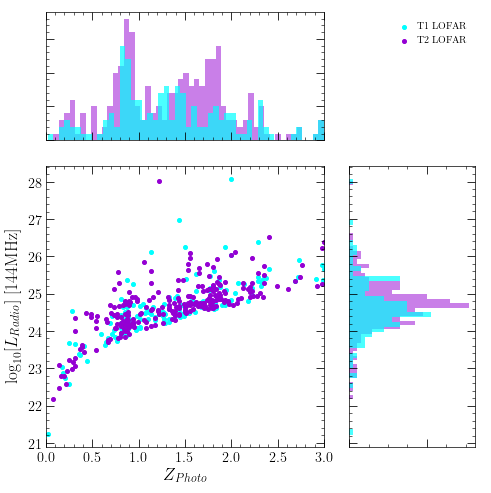

In [14]:
fig = plt.figure(figsize=(24,8))
gs = GridSpec(nrows=3,ncols=9, figure=fig)


ax = fig.add_subplot(gs[1:, 0:2])
ax.scatter(T1LMatchedLOFAR['zGA'],np.log10(T1LMatchedLOFAR['LT1LOFAR']), color = 'cyan', label = 'T1 LOFAR')
ax.scatter(T2LMatchedLOFAR['zGA'],np.log10(T2LMatchedLOFAR['LT2LOFAR']), color = 'darkviolet', label = 'T2 LOFAR')
#ax.hlines(45, -20, 10**4, colors='firebrick', linestyles='dashed', label='L = $10^{45}$ erg/s')
ax.minorticks_on()
ax.tick_params(which='both', direction='in', top="on", right='on')
ax.set_ylabel(r'$ \log_{10}[L_{Radio}]$ [144MHz] ')
ax.set_xlabel(r'$Z_{Photo}$')
ax.set_xlim(0, 3)
#ax.set_ylim(22,30)
#ax.hlines(45, 0, 3, colors = 'black', linestyles='dashed')
handles, labels = ax.get_legend_handles_labels()

ax = fig.add_subplot(gs[0, 2])
ax.axis('off')
ax.legend(handles=handles, labels=labels)

ax = fig.add_subplot(gs[0, 0:2])
ax.hist(T2LMatchedLOFAR['zGA'],bins=50, histtype ='bar', color = 'darkviolet', alpha = 0.5 )
ax.hist(T1LMatchedLOFAR['zGA'],bins=50, histtype ='bar', color = 'cyan', alpha = 0.7 )
ax.minorticks_on()
ax.tick_params(which='both', direction='in', top="on", right='on')
ax.set_xlim(0, 3)
#ax.set_ylim(10**0,10**4)
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
#ax.legend(frameon=False, loc=2)

ax = fig.add_subplot(gs[1:, 2])
ax.hist(np.log10(T2LMatchedLOFAR['LT2LOFAR']),bins=50, orientation='horizontal', histtype ='bar', color = 'darkviolet', alpha = 0.5 )
ax.hist(np.log10(T1LMatchedLOFAR['LT1LOFAR']),bins=50, orientation='horizontal', histtype ='bar', color = 'cyan', alpha = 0.7)
#ax.hlines(45, -20, 10**4, colors='firebrick', linestyles='dashed', label='L = $10^{45}$ erg/s')
ax.minorticks_on()
ax.tick_params(which='both', direction='in', top="on", right='on')
#ax.set_ylim(22,30)
#ax.set_xlim(10**0,10**4)
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
#ax.legend(frameon=False, loc=2)

[]

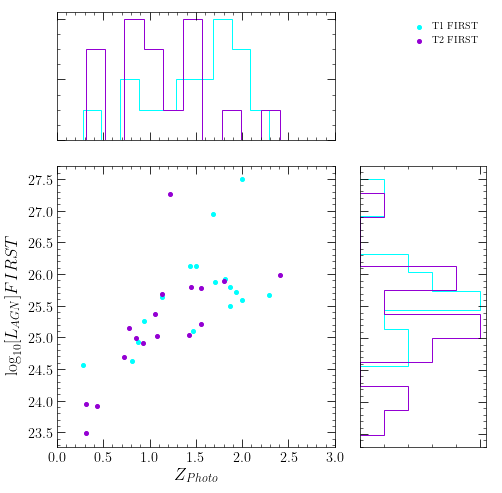

In [15]:
fig = plt.figure(figsize=(24,8))
gs = GridSpec(nrows=3,ncols=9, figure=fig)


ax = fig.add_subplot(gs[1:, 0:2])
ax.scatter(T1LMatchedFIRST['zGA'],np.log10(T1LMatchedFIRST['LT1FIRST']), color = 'cyan', label = 'T1 FIRST')
ax.scatter(T2LMatchedFIRST['zGA'],np.log10(T2LMatchedFIRST['LT2FIRST']), color = 'darkviolet', label = 'T2 FIRST')
#ax.hlines(45, -20, 10**4, colors='firebrick', linestyles='dashed', label='L = $10^{45}$ erg/s')
ax.minorticks_on()
ax.tick_params(which='both', direction='in', top="on", right='on')
ax.set_ylabel(r'$ \log_{10}[L_{AGN}] FIRST $')
ax.set_xlabel(r'$Z_{Photo}$')
ax.set_xlim(0, 3)
#ax.set_ylim(22,30)
#ax.hlines(45, 0, 3, colors = 'black', linestyles='dashed')
handles, labels = ax.get_legend_handles_labels()

ax = fig.add_subplot(gs[0, 2])
ax.axis('off')
ax.legend(handles=handles, labels=labels)

ax = fig.add_subplot(gs[0, 0:2])
ax.hist(T1LMatchedFIRST['zGA'],bins=10, histtype ='step', color = 'cyan', density=False, lw=1, label="x", log=False )
ax.hist(T2LMatchedFIRST['zGA'],bins=10, histtype ='step', color = 'darkviolet', density=False, lw=1, label="x", log=False )
ax.minorticks_on()
ax.tick_params(which='both', direction='in', top="on", right='on')
ax.set_xlim(0, 3)
#ax.set_ylim(10**0,10**4)
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
#ax.legend(frameon=False, loc=2)

ax = fig.add_subplot(gs[1:, 2])
ax.hist(np.log10(T1LMatchedFIRST['LT1FIRST']),bins=10, orientation='horizontal', histtype ='step', color = 'cyan', density=False, lw=1, label="x", log=False )
ax.hist(np.log10(T2LMatchedFIRST['LT2FIRST']),bins=10, orientation='horizontal', histtype ='step', color = 'darkviolet', density=False, lw=1, label="x", log=False )
#ax.hlines(45, -20, 10**4, colors='firebrick', linestyles='dashed', label='L = $10^{45}$ erg/s')
ax.minorticks_on()
ax.tick_params(which='both', direction='in', top="on", right='on')
#ax.set_ylim(22,30)
#ax.set_xlim(10**0,10**4)
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
#ax.legend(frameon=False, loc=2)

[]

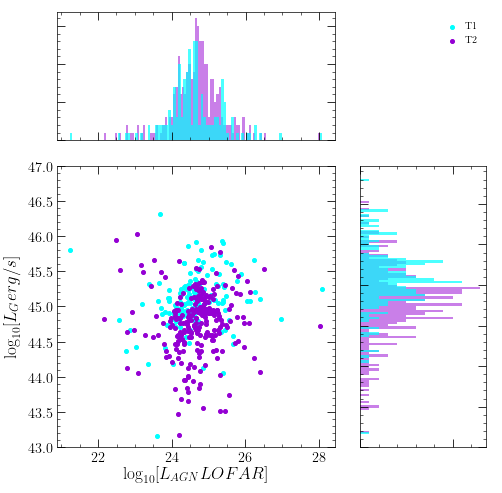

In [16]:
fig = plt.figure(figsize=(24,8))
gs = GridSpec(nrows=3,ncols=9, figure=fig)


ax = fig.add_subplot(gs[1:, 0:2])
ax.scatter(np.log10(T1LMatchedLOFAR['LT1LOFAR']),T1LMatchedLOFAR['LGalerg10'],c = 'cyan',label = 'T1' ,alpha = 1)
ax.scatter(np.log10(T2LMatchedLOFAR['LT2LOFAR']),T2LMatchedLOFAR['LGalerg10'],c = 'darkviolet',label = 'T2' ,alpha = 1)
ax.minorticks_on()
ax.tick_params(which='both', direction='in', top="on", right='on')
ax.set_ylabel(r'$ \log_{10}[L_{G} erg/s]$')
ax.set_xlabel(r'$ \log_{10}[L_{AGN} LOFAR]$')
#ax.set_xlim(45, 47.5)
ax.set_ylim(43,47)
handles, labels = ax.get_legend_handles_labels()

ax = fig.add_subplot(gs[0, 2])
ax.axis('off')
ax.legend(handles=handles, labels=labels)

ax = fig.add_subplot(gs[0, 0:2])
ax.hist(np.log10(T2LMatchedLOFAR['LT2LOFAR']), bins=100, histtype='bar', color='darkviolet', alpha = 0.5)
ax.hist(np.log10(T1LMatchedLOFAR['LT1LOFAR']), bins=100, histtype='bar', color='cyan', alpha = 0.7)
ax.minorticks_on()
ax.tick_params(which='both', direction='in', top="on", right='on')
#ax.set_xlim(45, 47.5)
#ax.set_ylim(10**0,10**4)
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
#ax.legend(frameon=False, loc=2)

ax = fig.add_subplot(gs[1:, 2])
ax.hist(T2LMatchedLOFAR['LGalerg10'], bins=100,orientation='horizontal', histtype='bar', color='darkviolet', alpha = 0.5)
ax.hist(T1LMatchedLOFAR['LGalerg10'], bins=100,orientation='horizontal', histtype='bar', color='cyan', alpha = 0.7)
ax.minorticks_on()
ax.tick_params(which='both', direction='in', top="on", right='on')
#ax.set_ylim(40,47)
#ax.set_xlim(10**0,10**1)
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
#ax.legend(frameon=False, loc=2)

[]

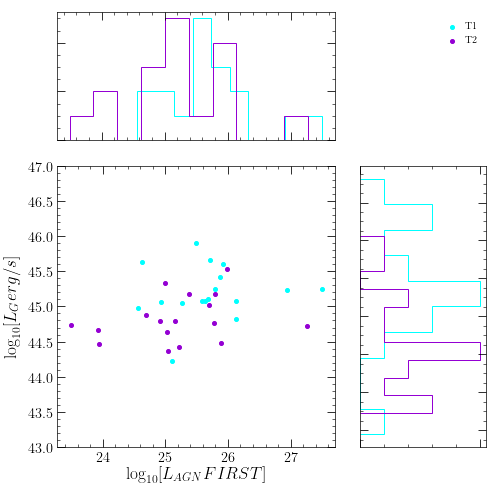

In [17]:
fig = plt.figure(figsize=(24,8))
gs = GridSpec(nrows=3,ncols=9, figure=fig)


ax = fig.add_subplot(gs[1:, 0:2])
ax.scatter(np.log10(T1LMatchedFIRST['LT1FIRST']),T1LMatchedFIRST['LGalerg10'],c = 'cyan',label = 'T1' ,alpha = 1)
ax.scatter(np.log10(T2LMatchedFIRST['LT2FIRST']),T2LMatchedFIRST['LGalerg10'],c = 'darkviolet',label = 'T2' ,alpha = 1)
ax.minorticks_on()
ax.tick_params(which='both', direction='in', top="on", right='on')
ax.set_ylabel(r'$ \log_{10}[L_{G} erg/s]$')
ax.set_xlabel(r'$ \log_{10}[L_{AGN} FIRST]$')
#ax.set_xlim(45, 47.5)
ax.set_ylim(43,47)
handles, labels = ax.get_legend_handles_labels()

ax = fig.add_subplot(gs[0, 2])
ax.axis('off')
ax.legend(handles=handles, labels=labels)

ax = fig.add_subplot(gs[0, 0:2])
ax.hist(np.log10(T1LMatchedFIRST['LT1FIRST']), bins=10, histtype='step', color='cyan')
ax.hist(np.log10(T2LMatchedFIRST['LT2FIRST']), bins=10, histtype='step', color='darkviolet')
ax.minorticks_on()
ax.tick_params(which='both', direction='in', top="on", right='on')
#ax.set_xlim(45, 47.5)
#ax.set_ylim(10**0,10**4)
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
#ax.legend(frameon=False, loc=2)

ax = fig.add_subplot(gs[1:, 2])
ax.hist(T1LMatchedFIRST['LGalerg10'], bins=10,orientation='horizontal', histtype='step', color='cyan')
ax.hist(T2LMatchedFIRST['LGalerg10'], bins=10,orientation='horizontal', histtype='step', color='darkviolet')
ax.minorticks_on()
ax.tick_params(which='both', direction='in', top="on", right='on')
#ax.set_ylim(40,47)
#ax.set_xlim(10**0,10**1)
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
#ax.legend(frameon=False, loc=2)

In [18]:
#need to remove 0 values but it will reduce sample so careful what analysis follows

In [19]:
#remove the values where they are all 0
T1LMatchedLOFAR1 = T1LMatchedLOFAR[[np.isfinite(T1LMatchedLOFAR['LGalLOG10'])]]
T1LMatchedLOFAR2 = T1LMatchedLOFAR[[np.isfinite(T1LMatchedLOFAR['LSFRLOG10'])]]
print (len(T1LMatchedLOFAR),len(T1LMatchedLOFAR1),len(T1LMatchedLOFAR2))

155 155 129


In [20]:
#remove the values where they are all 0
T2LMatchedLOFAR1 = T2LMatchedLOFAR[[np.isfinite(T2LMatchedLOFAR['LGalLOG10'])]]
T2LMatchedLOFAR2 = T2LMatchedLOFAR[[np.isfinite(T2LMatchedLOFAR['LSFRLOG10'])]]
print (len(T2LMatchedLOFAR),len(T2LMatchedLOFAR1),len(T2LMatchedLOFAR2))

251 251 239


[]

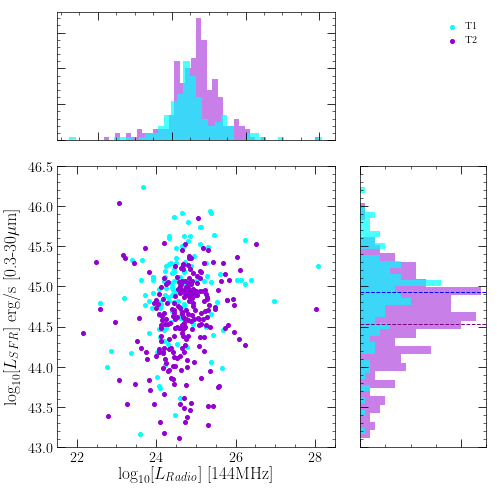

In [21]:
fig = plt.figure(figsize=(24,8))
gs = GridSpec(nrows=3,ncols=9, figure=fig)


ax = fig.add_subplot(gs[1:, 0:2])
ax.scatter(np.log10(T1LMatchedLOFAR2['LT1LOFAR']),T1LMatchedLOFAR2['LSFRerg10'],c = 'cyan',label = 'T1' ,alpha = 1)
ax.scatter(np.log10(T2LMatchedLOFAR2['LT2LOFAR']),T2LMatchedLOFAR2['LSFRerg10'],c = 'darkviolet',label = 'T2' ,alpha = 1)
ax.minorticks_on()
ax.tick_params(which='both', direction='in', top="on", right='on')
ax.set_ylabel(r'$ \log_{10}[L_{SFR}]$ erg/s [0.3-30$\mu$m]')
ax.set_xlabel(r'$ \log_{10}[L_{Radio}]$ [144MHz] ')
ax.set_xlim(21.5, 28.5)
ax.set_ylim(43,46.5)
handles, labels = ax.get_legend_handles_labels()

ax = fig.add_subplot(gs[0, 2])
ax.axis('off')
ax.legend(handles=handles, labels=labels)

ax = fig.add_subplot(gs[0, 0:2])
ax.hist(np.log10(T2LMatchedLOFAR2['LT2LOFAR']), bins=40, histtype='bar', color='darkviolet', alpha = 0.5)
ax.hist(np.log10(T1LMatchedLOFAR2['LT1LOFAR']), bins=40, histtype='bar', color='cyan', alpha = 0.7)
ax.minorticks_on()
ax.tick_params(which='both', direction='in', top="on", right='on')
#ax.set_xlim(45, 47.5)
#ax.set_ylim(10**0,10**4)
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
#ax.legend(frameon=False, loc=2)

ax = fig.add_subplot(gs[1:, 2])
ax.hist(T2LMatchedLOFAR2['LSFRerg10'], bins=40,orientation='horizontal', histtype='bar', color='darkviolet', alpha = 0.5)
ax.hist(T1LMatchedLOFAR2['LSFRerg10'], bins=40,orientation='horizontal', histtype='bar', color='cyan', alpha = 0.7)
ax.hlines(np.mean(T2LMatchedLOFAR2['LSFRerg10']), 0, 30, colors = 'purple', linestyles='dashed')
ax.hlines(np.mean(T1LMatchedLOFAR2['LSFRerg10']), 0, 30, colors = 'blue', linestyles='dashed')
ax.minorticks_on()
ax.tick_params(which='both', direction='in', top="on", right='on')
ax.set_ylim(43,46.5)
ax.set_xlim(0,25)
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
#ax.legend(frameon=False, loc=2)

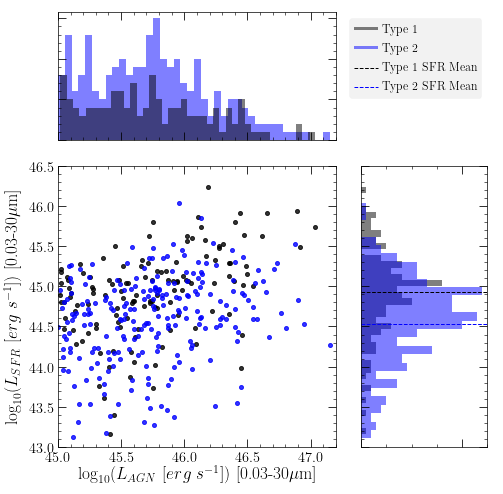

In [46]:
fig = plt.figure(figsize=(24,8))
gs = GridSpec(nrows=3,ncols=9, figure=fig)


ax = fig.add_subplot(gs[1:, 0:2])
ax.scatter(T1LMatchedLOFAR2['LAGNerg'],T1LMatchedLOFAR2['LSFRerg10'],c = 'black',label = 'T1' ,alpha = 0.8)
ax.scatter(T2LMatchedLOFAR2['LAGNerg'],T2LMatchedLOFAR2['LSFRerg10'],c = 'blue',label = 'T2' ,alpha = 0.8)
ax.minorticks_on()
ax.tick_params(which='both', direction='in', top="on", right='on')
ax.set_ylabel(r'$ \log_{10}(L_{SFR}\ [erg\ s^{-1}])$ [0.03-30$\mu$m]')
ax.set_xlabel(r'$ \log_{10}(L_{AGN}\ [erg\ s^{-1}])$ [0.03-30$\mu$m]')
ax.set_xlim(45, 47.2)
ax.set_ylim(43,46.5)


ax = fig.add_subplot(gs[0, 0:2])
ax.hist(T2LMatchedLOFAR2['LAGNerg'], bins=40, histtype='bar', color='blue', alpha = 0.5)
ax.hist(T1LMatchedLOFAR2['LAGNerg'], bins=40, histtype='bar', color='black', alpha = 0.5)
ax.minorticks_on()
ax.tick_params(which='both', direction='in', top="on", right='on')
ax.set_xlim(45, 47.2)
#ax.set_ylim(10**0,10**4)
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
#ax.legend(frameon=False, loc=2)

ax = fig.add_subplot(gs[1:, 2])
ax.hist(T1LMatchedLOFAR2['LSFRerg10'], bins=40,orientation='horizontal', histtype='bar', color='black', alpha = 0.5, label = 'Type 1')
ax.hist(T2LMatchedLOFAR2['LSFRerg10'], bins=40,orientation='horizontal', histtype='bar', color='blue', alpha = 0.5, label = 'Type 2')
ax.hlines(np.mean(T1LMatchedLOFAR2['LSFRerg10']), 0, 30, colors = 'black', linestyles='dashed', label ='Type 1 SFR Mean', alpha = 1)
ax.hlines(np.mean(T2LMatchedLOFAR2['LSFRerg10']), 0, 30, colors = 'blue', linestyles='dashed', label ='Type 2 SFR Mean', alpha = 1)
ax.minorticks_on()
ax.tick_params(which='both', direction='in', top="on", right='on')
ax.set_ylim(43,46.5)
ax.set_xlim(0,25)
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
#ax.legend(frameon=False, loc=2)
handles, labels = ax.get_legend_handles_labels()


ax = fig.add_subplot(gs[0, 2])
ax.axis('off')
ax.legend(handles=handles, labels=labels,fontsize='12',frameon = True, framealpha=0.1, facecolor = 'gray')
plt.savefig('Figure11.png')


[]

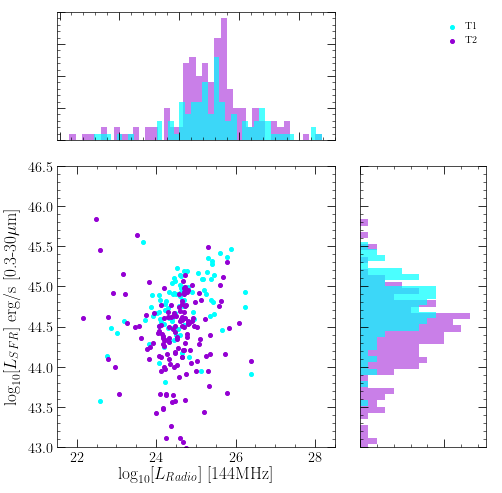

In [23]:
fig = plt.figure(figsize=(24,8))
gs = GridSpec(nrows=3,ncols=9, figure=fig)


ax = fig.add_subplot(gs[1:, 0:2])
ax.scatter(np.log10(T1LMatchedLOFARE['LT1LOFAR']),T1LMatchedLOFARE['LEllerg10'],c = 'cyan',label = 'T1' ,alpha = 1)
ax.scatter(np.log10(T2LMatchedLOFARE['LT2LOFAR']),T2LMatchedLOFARE['LEllerg10'],c = 'darkviolet',label = 'T2' ,alpha = 1)
ax.minorticks_on()
ax.tick_params(which='both', direction='in', top="on", right='on')
ax.set_ylabel(r'$ \log_{10}[L_{SFR}]$ erg/s [0.3-30$\mu$m]')
ax.set_xlabel(r'$ \log_{10}[L_{Radio}]$ [144MHz] ')
ax.set_xlim(21.5, 28.5)
ax.set_ylim(43,46.5)
handles, labels = ax.get_legend_handles_labels()

ax = fig.add_subplot(gs[0, 2])
ax.axis('off')
ax.legend(handles=handles, labels=labels)

ax = fig.add_subplot(gs[0, 0:2])
ax.hist(np.log10(T2LMatchedLOFARE['LT2LOFAR']), bins=40, histtype='bar', color='darkviolet', alpha = 0.5)
ax.hist(np.log10(T1LMatchedLOFARE['LT1LOFAR']), bins=40, histtype='bar', color='cyan', alpha = 0.7)
ax.minorticks_on()
ax.tick_params(which='both', direction='in', top="on", right='on')
#ax.set_xlim(45, 47.5)
#ax.set_ylim(10**0,10**4)
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
#ax.legend(frameon=False, loc=2)

ax = fig.add_subplot(gs[1:, 2])
ax.hist(T2LMatchedLOFARE['LEllerg10'], bins=40,orientation='horizontal', histtype='bar', color='darkviolet', alpha = 0.5)
ax.hist(T1LMatchedLOFARE['LEllerg10'], bins=40,orientation='horizontal', histtype='bar', color='cyan', alpha = 0.7)
#ax.hlines(np.mean(T2LMatchedLOFARE['LEllerg10']), 0, 30, colors = 'purple', linestyles='dashed')
#ax.hlines(np.mean(T1LMatchedLOFARE['LEllerg10']), 0, 30, colors = 'blue', linestyles='dashed')
ax.minorticks_on()
ax.tick_params(which='both', direction='in', top="on", right='on')
ax.set_ylim(43,46.5)
ax.set_xlim(0,15)
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
#ax.legend(frameon=False, loc=2)

In [24]:
np.median(T2LMatchedLOFAR2['LSFRerg10'])

44.62900002479553

In [25]:
np.median(T1LMatchedLOFAR2['LSFRerg10'])

44.99199994087219

In [26]:
T1LMatchedLOFAR

RA1,Dec1,Imag,S,zspec,N,zG,chi2G,LEll,LSbc,LIrr,zGA,chi2GA,LAGNp,LELLp,LSbcp,LIrrp,F,EBV,Chi2S,SType,LAGNerg,LSbcerg,LEllerg,LIrrerg,AV,Source_id,Isl_id,RA,E_RA,DEC,E_DEC,Total_flux,E_Total_flux,Peak_flux,E_Peak_flux,RA_max,E_RA_max,DEC_max,E_DEC_max,Maj,E_Maj,Min,E_Min,PA,E_PA,Maj_img_plane,E_Maj_img_plane,Min_img_plane,E_Min_img_plane,PA_img_plane,E_PA_img_plane,DC_Maj,E_DC_Maj,DC_Min,E_DC_Min,DC_PA,E_DC_PA,DC_Maj_img_plane,E_DC_Maj_img_plane,DC_Min_img_plane,E_DC_Min_img_plane,DC_PA_img_plane,E_DC_PA_img_plane,Isl_Total_flux,E_Isl_Total_flux,Isl_rms,Isl_mean,Resid_Isl_rms,Resid_Isl_mean,S_Code,Separation,dL,dLcm,LT1LOFAR,LSbc10,LEll10,LIrr10,LSbcUNLOG10,LEllUNLOG10,LIrrUNLOG10,LSbcUNLOG10c,LEllUNLOG10c,LIrrUNLOG10c,LGalUNLOG10,LSFRUNLOG10,LGalLOG10,LSFRLOG10,LEllLOG10,LGalerg10,LSFRerg10,LEllerg10
,,,,,,,,,,,,,,,,,,,,,,,,,,,,deg,deg,deg,deg,Jy,Jy,Jy / beam,Jy / beam,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,Jy,Jy,Jy / beam,Jy / beam,Jy / beam,Jy / beam,,arcsec,Mpc,cm,cm,,,,,,,,,,,,,,,,,
float64,float64,float64,float64,float64,bytes4,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bytes5,float64,float64,float32,float64,float64,int32,int32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bytes1,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
217.24208,32.48081,18.610000610351562,0.9700000286102295,-99.98999786376953,14/0,0.009999999776482582,85.83999633789062,0.0,-2.8329999446868896,-2.438999891281128,2.3499999046325684,5.070000171661377,3.134999990463257,1.562000036239624,0.0,0.0,72.6500015258789,0.009999999776482582,172.24000549316406,a/f,46.714999999999996,40.747,43.58,41.141,0.032,25687,26125,217.24201975289367,5.094593535854508e-05,32.48065654752494,4.579965976964069e-05,0.000925063302650731,0.00010346565123623794,0.0008662572903617046,5.712690590254876e-05,217.24201975289367,5.094593535854508e-05,32.48065654752494,4.579965976964069e-05,0.0017785819956815515,0.00012101624913014076,0.001668954056096369,0.00010667490349051514,73.57269727637339,42.517648558689025,0.0017785810813759349,0.00012101624913014076,0.0016678169411634366,0.00010667490349051514,73.97999124175499,42.517648558689025,0.0006209454739920696,0.00012101624913014076,6.197421569731186e-05,0.00010667490349051514,73.5726972763734,42.517648558689025,0.0006209451547847125,0.00012101624913014076,6.193199055401905e-05,0.00010667490349051514,73.979991241755,42.517648558689025,0.0008622746797583263,7.477870094967875e-05,5.628556608280632e-05,0.0,1.7942253807632367e-05,2.3574671695314463e-07,S,0.5819388220045635,18919.48290319087,5.837942424732789e+28,2.913180691632807e+25,10.0,11.562000036239624,10.0,10000000000.0,364753977362.4358,10000000000.0,0.0,364753977362.4358,0.0,364753977362.4358,0.0,11.562000036239624,-inf,11.562000036239624,45.14200003623962,-inf,45.14200003623962
217.54525,32.54919,18.530000686645508,0.9100000262260437,1.0299999713897705,14/0,0.009999999776482582,82.58000183105469,0.0,1.5149999856948853,1.531000018119812,0.3100000023841858,12.930000305175781,2.0850000381469727,-1.1729999780654907,0.0,1.75,27.920000076293945,0.25,183.2100067138672,f/g,45.665,45.095,43.58,45.111,0.8,23185,23578,217.54525530609627,2.1971378686935617e-05,32.54918438331705,2.0891223490721427e-05,0.0016083758330462277,0.00013291321814304884,0.00148448178082947,5.3962348392815325e-05,217.5457474466864,2.1971378686935617e-05,32.548787324045236,2.0891223490721427e-05,0.0015575495533638563,5.645828026969952e-05,0.0013809767608169816,4.3697881603646516

[]

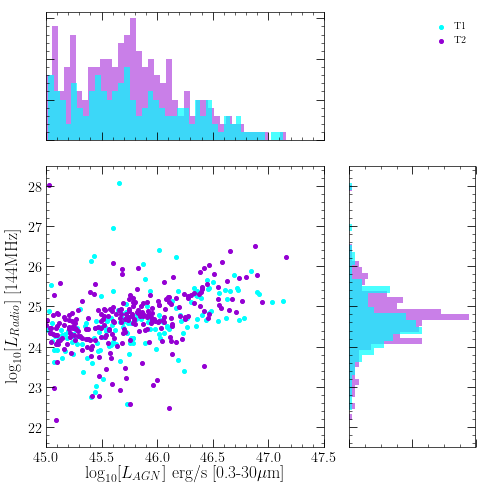

In [27]:
fig = plt.figure(figsize=(24,8))
gs = GridSpec(nrows=3,ncols=9, figure=fig)


ax = fig.add_subplot(gs[1:, 0:2])
ax.scatter(T1LMatchedLOFAR['LAGNerg'], np.log10(T1LMatchedLOFAR['LT1LOFAR']),c = 'cyan',label = 'T1' ,alpha = 1)
ax.scatter(T2LMatchedLOFAR['LAGNerg'],np.log10(T2LMatchedLOFAR['LT2LOFAR']),c = 'darkviolet',label = 'T2' ,alpha = 1)
ax.minorticks_on()
ax.tick_params(which='both', direction='in', top="on", right='on')
ax.set_xlabel(r'$ \log_{10}[L_{AGN}]$ erg/s [0.3-30$\mu$m]')
ax.set_ylabel(r'$ \log_{10}[L_{Radio}]$ [144MHz] ')
ax.set_ylim(21.5, 28.5)
ax.set_xlim(45,47.5)
handles, labels = ax.get_legend_handles_labels()

ax = fig.add_subplot(gs[0, 2])
ax.axis('off')
ax.legend(handles=handles, labels=labels)

ax = fig.add_subplot(gs[0, 0:2])
ax.hist(T2LMatchedLOFAR['LAGNerg'], bins=40, histtype='bar', color='darkviolet', alpha = 0.5)
ax.hist(T1LMatchedLOFAR['LAGNerg'], bins=40, histtype='bar', color='cyan', alpha = 0.7)
ax.minorticks_on()
ax.tick_params(which='both', direction='in', top="on", right='on')
ax.set_xlim(45, 47.5)
#ax.set_ylim(10**0,10**4)
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
#ax.legend(frameon=False, loc=2)

ax = fig.add_subplot(gs[1:, 2])
ax.hist(np.log10(T2LMatchedLOFAR['LT2LOFAR']), bins=40,orientation='horizontal', histtype='bar', color='darkviolet', alpha = 0.5)
ax.hist(np.log10(T1LMatchedLOFAR['LT1LOFAR']), bins=40,orientation='horizontal', histtype='bar', color='cyan', alpha = 0.7)
ax.minorticks_on()
ax.tick_params(which='both', direction='in', top="on", right='on')
ax.set_ylim(21.5, 28.5)
#ax.set_xlim(0,25)
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
#ax.legend(frameon=False, loc=2)

In [28]:
r = np.log10((1.44*10**(15)*T1LMatchedLOFAR['LT1LOFAR'])/(10**(T1LMatchedLOFAR['LAGNerg'])))
46.714999999999996
2.913180691632807e+25
25.46436742281693

25.46436742281693

In [29]:
y = 46.714999999999996 - 6.092270085087815 + np.log10(1.44*10**(15))
print (y)

55.781092407007435


In [30]:
r1 = np.log10((1.44*10**(15)*2.913180691632807*10**(25))/(10**46.714999999999996))
print (r1)

-6.092270085087815


In [31]:
np.log10(2.913180691632807*10**(25))

25.46436742281693

In [32]:
np.log10((10**-6*10**T1LMatchedLOFAR['LAGNerg'])/(1.44*10**(15)))

25.556637507904746
24.50663750790475
25.327637507904747
25.19263750790475
25.199637507904747
23.895637507904745
24.76763750790475
24.66463750790475
24.24463750790475
25.87463750790475
24.29263750790475


In [33]:
print(r)

      LT1LOFAR     
         cm        
-------------------
 -6.092270085087815
 -6.865525667272586
 -6.452713527591034
 -6.688957217039869
 -6.511492938826745
 -5.301716585887478
 -6.059165311159852
 -5.886293400827657
 -4.117815149452063
 -6.770260481488845
                ...
 -6.450730569455857
 -5.736386815360523
 -5.696003688493464
 -6.507676004787155
-5.0551430828317425
-5.7525560309451915
 -6.342668514687048
 -6.041535782164143
 -5.903833064562126
 -5.714744137614642
Length = 155 rows


In [34]:
x = np.linspace(43,48,50)


In [35]:
ym6 = np.log10((10**-6*10**x)/(1.44*10**(15)))
ym7 = np.log10((10**-7*10**x)/(1.44*10**(15)))
ym5 = np.log10((10**-5*10**x)/(1.44*10**(15)))
ym4 = np.log10((10**-4*10**x)/(1.44*10**(15)))
ym3 = np.log10((10**-3*10**x)/(1.44*10**(15)))
ym8 = np.log10((10**-8*10**x)/(1.44*10**(15)))

In [36]:
ym65 = np.log10((10**-6.5*10**x)/(1.44*10**(15)))
ym6 = np.log10((10**-6*10**x)/(1.44*10**(15)))
ym55 = np.log10((10**-5.5*10**x)/(1.44*10**(15)))
ym5 = np.log10((10**-5*10**x)/(1.44*10**(15)))
ym45 = np.log10((10**-4.5*10**x)/(1.44*10**(15)))
ym4 = np.log10((10**-4*10**x)/(1.44*10**(15)))
ym35 = np.log10((10**-3.5*10**x)/(1.44*10**(15)))
ym3 = np.log10((10**-3*10**x)/(1.44*10**(15)))

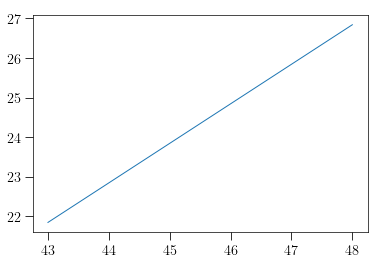

In [37]:
plt.plot(x, ym6)

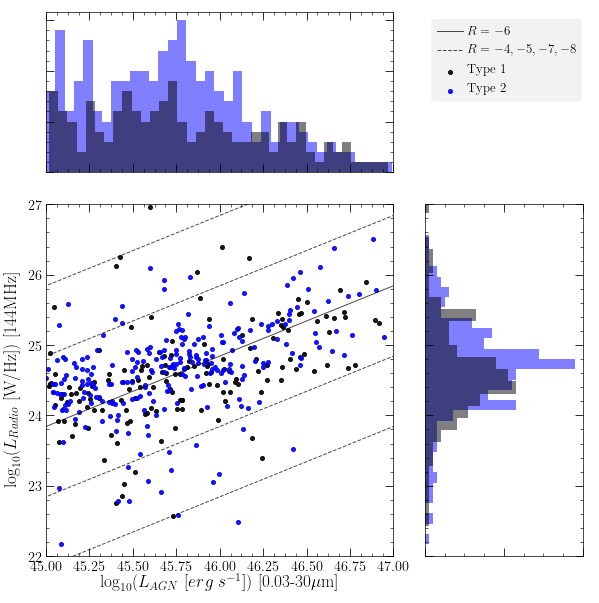

In [51]:
fig = plt.figure(figsize=(30,10))
gs = GridSpec(nrows=3,ncols=9, figure=fig)


ax1 = fig.add_subplot(gs[1:, 0:2])
ax1.scatter(T1LMatchedLOFAR['LAGNerg'], np.log10(T1LMatchedLOFAR['LT1LOFAR']),c = 'black',label = 'Type 1' ,alpha = 0.9)
ax1.scatter(T2LMatchedLOFAR['LAGNerg'],np.log10(T2LMatchedLOFAR['LT2LOFAR']),c = 'blue',label = 'Type 2' ,alpha = 0.9)
ax1.plot(x, ym6, color = 'black', label = '$R=-6$', alpha = 0.7)
ax1.plot(x, ym5,linestyle = 'dashed', color = 'black', label = '$R=-4,-5,-7,-8$', alpha = 0.7)
ax1.plot(x, ym7, linestyle = 'dashed', color = 'black', label = '_no_label', alpha = 0.7)
ax1.plot(x, ym4, linestyle = 'dashed', color = 'black', label = '_no_label', alpha = 0.7)
ax1.plot(x, ym8, linestyle = 'dashed', color = 'black', label = '_no_label', alpha = 0.7)
ax1.minorticks_on()
ax1.tick_params(which='both', direction='in', top="on", right='on')
ax1.set_xlabel(r'$ \log_{10}(L_{AGN}\ [erg\ s^{-1}])$ [0.03-30$\mu$m]')
ax1.set_ylabel(r'$ \log_{10}(L_{Radio}\ $[W/Hz]) [144MHz] ')
ax1.set_ylim(22, 27)
ax1.set_xlim(45,47)
handles1, labels1 = ax1.get_legend_handles_labels()


ax2 = fig.add_subplot(gs[0, 0:2])
ax2.hist(T2LMatchedLOFAR['LAGNerg'], bins=40, histtype='bar', color='blue', alpha = 0.5)
ax2.hist(T1LMatchedLOFAR['LAGNerg'], bins=40, histtype='bar', color='black', alpha = 0.5)
ax2.minorticks_on()
ax2.tick_params(which='both', direction='in', top="on", right='on')
ax2.set_xlim(45, 47)
#ax.set_ylim(10**0,10**4)
ax2.axes.xaxis.set_ticklabels([])
ax2.axes.yaxis.set_ticklabels([])
#ax.legend(frameon=False, loc=2)

ax3 = fig.add_subplot(gs[1:, 2])
ax3.hist(np.log10(T2LMatchedLOFAR['LT2LOFAR']), bins=40,orientation='horizontal', histtype='bar', color='blue', alpha = 0.5)
ax3.hist(np.log10(T1LMatchedLOFAR['LT1LOFAR']), bins=40,orientation='horizontal', histtype='bar', color='black', alpha = 0.5)
ax3.minorticks_on()
ax3.tick_params(which='both', direction='in', top="on", right='on')
ax3.set_ylim(22, 27)
ax3.set_xlim(0,40)
ax3.axes.xaxis.set_ticklabels([])
ax3.axes.yaxis.set_ticklabels([])


ax4 = fig.add_subplot(gs[0, 2])
ax4.axis('off')
ax4.legend(handles=handles1, labels=labels1, fontsize=13, loc=2,frameon = True, framealpha=0.1, facecolor = 'gray')
plt.savefig('Figure13.png')

In [39]:
from scipy.stats import anderson_ksamp
KS  = ks_2samp(T1LMatchedLOFAR['LT1LOFAR'],T2LMatchedLOFAR['LT2LOFAR'] )
print (KS)

Ks_2sampResult(statistic=0.1488497622413571, pvalue=0.025534512707479345)


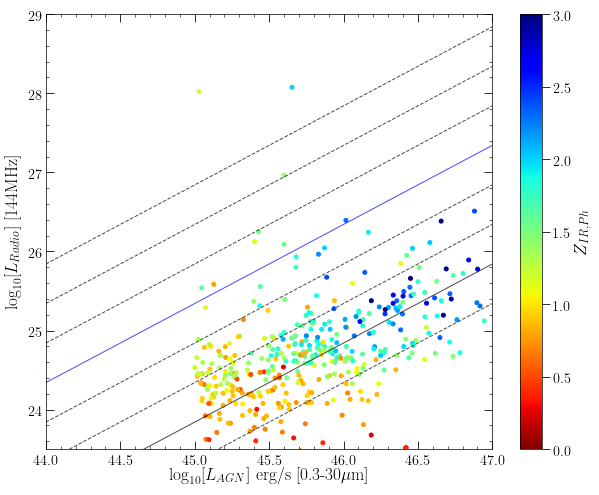

In [40]:
plt.figure(figsize=(10,8))
plt.scatter(T1LMatchedLOFAR['LAGNerg'], np.log10(T1LMatchedLOFAR['LT1LOFAR']),c = T1LMatchedLOFAR['zGA'],vmin =0, vmax=3, cmap = plt.cm.jet_r,label = 'T1' ,alpha = 1)
plt.scatter(T2LMatchedLOFAR['LAGNerg'],np.log10(T2LMatchedLOFAR['LT2LOFAR']),c = T2LMatchedLOFAR['zGA'],vmin =0, vmax=3, cmap = plt.cm.jet_r,label = 'T2' ,alpha = 1)
plt.plot(x, ym6,color = 'black', label = 'R=-6', alpha = 0.7)
plt.plot(x, ym5,linestyle = 'dashed', color = 'black', label = 'R=-5', alpha = 0.7)
plt.plot(x, ym4,linestyle = 'dashed', color = 'black', label = 'R=-4', alpha = 0.7)
plt.plot(x, ym45, color = 'blue', label = 'R=-4.5', alpha = 0.7)
plt.plot(x, ym3, linestyle = 'dashed', color = 'black', label = 'R=-3', alpha = 0.7)
plt.plot(x, ym35, linestyle = 'dashed', color = 'black', label = 'R=-3.5', alpha = 0.7)
plt.plot(x, ym55, linestyle = 'dashed', color = 'black', label = 'R=-5.5', alpha = 0.7)
plt.plot(x, ym65, linestyle = 'dashed', color = 'black', label = 'R=-6.5', alpha = 0.7)
plt.minorticks_on()
plt.tick_params(which='both', direction='in', top="on", right='on')
plt.xlabel(r'$ \log_{10}[L_{AGN}]$ erg/s [0.3-30$\mu$m]')
plt.ylabel(r'$ \log_{10}[L_{Radio}]$ [144MHz] ')
plt.ylim(23.5, 29)
plt.xlim(44,47)
cbar = plt.colorbar()
cbar.set_label(r'$Z_{IR,Ph}$')

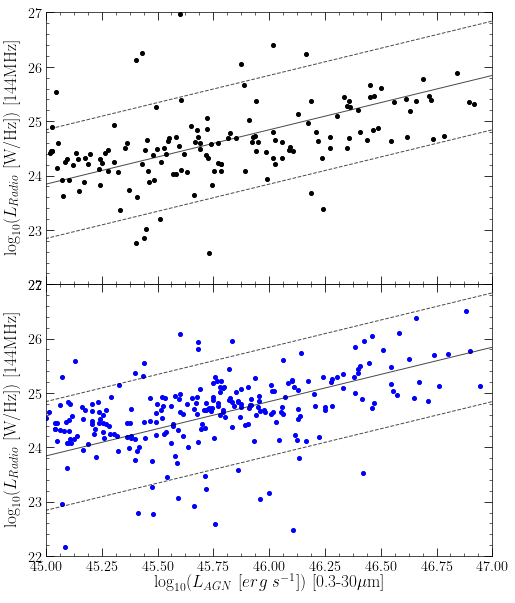

In [41]:
fig = plt.figure(figsize=(8,10))
gs = GridSpec(nrows=2,ncols=1, figure=fig)

ax1 = fig.add_subplot(gs[0, 0])
ax1.scatter(T1LMatchedLOFAR['LAGNerg'], np.log10(T1LMatchedLOFAR['LT1LOFAR']),c = 'black', label = 'T1' ,alpha = 1)
#ax.scatter(T2LMatchedLOFAR['LAGNerg'],np.log10(T2LMatchedLOFAR['LT2LOFAR']),c = T2LMatchedLOFAR['zGA'],vmin =0, vmax=3, cmap = plt.cm.jet_r, label = 'T2' ,alpha = 1)
ax1.plot(x, ym6, color = 'black', label = 'R=-6', alpha = 0.7)
ax1.plot(x, ym5,linestyle = 'dashed', color = 'black', label = 'R=-5', alpha = 0.7)
ax1.plot(x, ym7, linestyle = 'dashed', color = 'black', label = 'R=-7', alpha = 0.7)
ax1.minorticks_on()
ax1.tick_params(which='both', direction='in', top="on", right='on')
#ax.set_xlabel(r'$ \log_{10}[L_{AGN}]$ erg/s [0.3-30$\mu$m]')
ax1.set_ylabel(r'$ \log_{10}(L_{Radio}\ $[W/Hz]) [144MHz] ')
ax1.set_ylim(22, 27)
ax1.set_xlim(45,47)
#cbar = plt.colorbar()
#cbar.set_label(r'$Z_{IR,Ph}$')


ax2 = fig.add_subplot(gs[1, 0])
#ax.scatter(T1LMatchedLOFAR['LAGNerg'], np.log10(T1LMatchedLOFAR['LT1LOFAR']),c = T1LMatchedLOFAR['zGA'],vmin =0, vmax=3, cmap = plt.cm.jet_r,label = 'T1' ,alpha = 1)
ax2.scatter(T2LMatchedLOFAR['LAGNerg'],np.log10(T2LMatchedLOFAR['LT2LOFAR']),c = 'blue',label = 'T2' ,alpha = 1)
ax2.plot(x, ym6, color = 'black', label = 'R=-6', alpha = 0.7)
plt.setp(ax1.get_xticklabels(), visible=False)
ax2.plot(x, ym5,linestyle = 'dashed', color = 'black', label = 'R=-5', alpha = 0.7)
ax2.plot(x, ym7, linestyle = 'dashed', color = 'black', label = 'R=-7', alpha = 0.7)
ax2.minorticks_on()
ax2.tick_params(which='both', direction='in', top="on", right='on')
ax2.set_xlabel(r'$ \log_{10}(L_{AGN}\ [erg\ s^{-1}])$ [0.3-30$\mu$m]')
ax2.set_ylabel(r'$ \log_{10}(L_{Radio}\ $[W/Hz]) [144MHz] ')
ax2.set_ylim(22, 27)
ax2.set_xlim(45,47)
#cbar = plt.colorbar()
#cbar.set_label(r'$Z_{IR,Ph}$')

plt.subplots_adjust(hspace=.0)

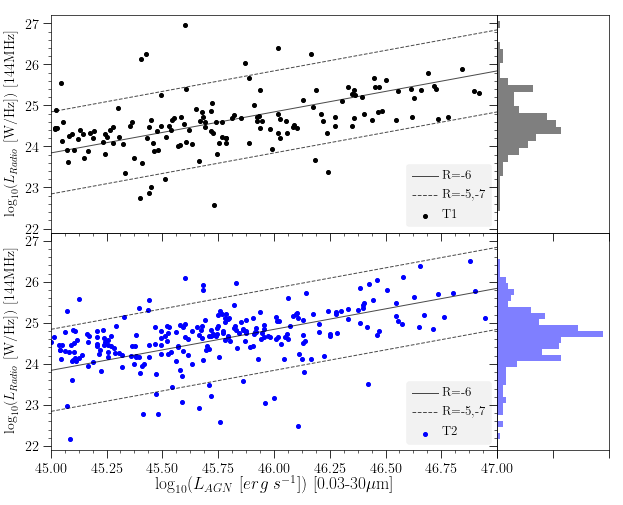

In [50]:
fig = plt.figure(figsize=(10,8))
gs = GridSpec(nrows=2,ncols=2, figure=fig,width_ratios=(4, 1))

ax1 = fig.add_subplot(gs[0,0])
ax1.minorticks_on()
ax1.scatter(T1LMatchedLOFAR['LAGNerg'], np.log10(T1LMatchedLOFAR['LT1LOFAR']),c = 'black', label = 'T1' ,alpha = 1)
#ax.scatter(T2LMatchedLOFAR['LAGNerg'],np.log10(T2LMatchedLOFAR['LT2LOFAR']),c = T2LMatchedLOFAR['zGA'],vmin =0, vmax=3, cmap = plt.cm.jet_r, label = 'T2' ,alpha = 1)
ax1.plot(x, ym6, color = 'black', label = 'R=-6', alpha = 0.7)
ax1.plot(x, ym5,linestyle = 'dashed', color = 'black', label = 'R=-5,-7', alpha = 0.7)
ax1.plot(x, ym7, linestyle = 'dashed', color = 'black', label = '_no_label', alpha = 0.7)
#ax1.tick_params(which='both', direction='in', top="on", right='on')
#ax.set_xlabel(r'$ \log_{10}[L_{AGN}]$ erg/s [0.3-30$\mu$m]')
ax1.set_ylabel(r'$ \log_{10}(L_{Radio}\ $[W/Hz]) [144MHz] ',fontsize = 14)
ax1.set_ylim(21.9, 27.2)
ax1.set_xlim(45,47)
ax1.legend(fontsize='13', loc =4,frameon = True, framealpha=0.1, facecolor = 'gray')



ax2 = fig.add_subplot(gs[1,0], sharex = ax1)
ax2.minorticks_on()
ax2.scatter(T2LMatchedLOFAR['LAGNerg'],np.log10(T2LMatchedLOFAR['LT2LOFAR']),c = 'blue',label = 'T2' ,alpha = 1)
ax2.plot(x, ym6, color = 'black', label = 'R=-6', alpha = 0.7)
plt.setp(ax1.get_xticklabels(), visible=False)
ax2.plot(x, ym5,linestyle = 'dashed', color = 'black', label = 'R=-5,-7', alpha = 0.7)
ax2.plot(x, ym7, linestyle = 'dashed', color = 'black', label = '_no_label', alpha = 0.7)
#ax2.tick_params(which='both', direction='in', top="on", right='on')
ax2.set_xlabel(r'$ \log_{10}(L_{AGN}\ [erg\ s^{-1}])$ [0.03-30$\mu$m]')
ax2.set_ylabel(r'$\log_{10}(L_{Radio}\ $[W/Hz]) [144MHz] ',fontsize = 14)
ax2.set_ylim(21.9, 27.2)
ax2.set_xlim(45,47)
ax2.legend(fontsize='13', loc =4,frameon = True, framealpha=0.1, facecolor = 'gray')

#ax2.tick_params(which='both', direction='in', top="on", right='on')
#ax2.set_xlabel('Redshift')
#ax2.set_ylabel('Number of AGN')
#ax2.set_ylim(0, 48)
#ax2.set_xlim(0,3.2)

ax3 = fig.add_subplot(gs[0,1], sharey = ax1)
plt.setp(ax3.get_yticklabels(), visible=False)
plt.setp(ax3.get_xticklabels(), visible=False)
ax3.hist(np.log10(T1LMatchedLOFAR['LT1LOFAR']), bins=40,orientation='horizontal', histtype='bar', color='black', alpha = 0.5)
#ax3.minorticks_on()
#ax3.tick_params(which='both', direction='in', top="on", right='on')
ax3.set_ylim(21.9, 27.2)
ax3.set_xlim(0,40)

#ax3.set_xlim(44.9,47.3)
#ax3.set_ylim(0, 150)



ax4 = fig.add_subplot(gs[1,1], sharex = ax3, sharey = ax2)
plt.setp(ax4.get_xticklabels(), visible=False)
plt.setp(ax4.get_yticklabels(), visible=False)
#ax4.minorticks_on()
ax4.hist(np.log10(T2LMatchedLOFAR['LT2LOFAR']), bins=40,orientation='horizontal', histtype='bar', color='blue', alpha = 0.5)
ax4.set_ylim(21.9, 27.2)
ax4.set_xlim(0,40)

#ax4.set_xlabel(r'$ \log_{10}(L_{AGN}[erg\ s^{-1}])$ [0.3-30$\mu$m]')
#ax4.set_xlim(44.9,47.3)
#ax4.set_ylim(0, 48)

plt.subplots_adjust(hspace=.0)
plt.subplots_adjust(wspace =.0)
plt.savefig('Figure14.png')


In [43]:
rT1 = np.log10((1.44*10**(15)*T1LMatchedLOFAR['LT1LOFAR'])/(10**(T1LMatchedLOFAR['LAGNerg'])))



In [44]:
a= np.mean(rT1)
b = np.mean(rT2)
print (a,b,np.subtract(a,b))



NameError: name 'rT2' is not defined

In [52]:
rT2 = np.log10((1.44*10**(15)*T2LMatchedLOFAR['LT2LOFAR'])/(10**(T2LMatchedLOFAR['LAGNerg'])))

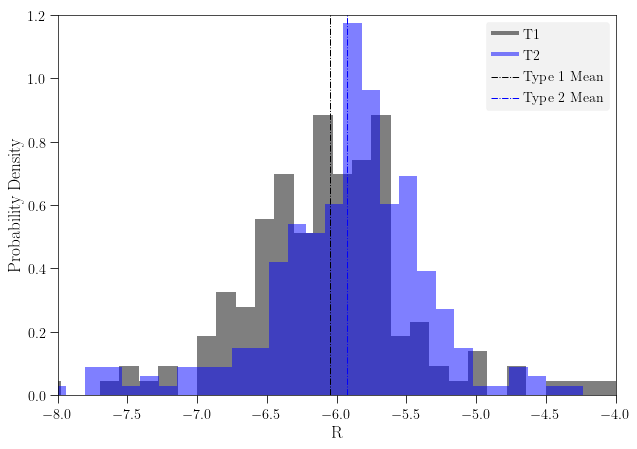

In [55]:
plt.figure(figsize=(10,7))
plt.hist(rT1,bins=50, histtype='bar', color='black', alpha = 0.5, label = 'T1', density = True)
plt.hist(rT2,bins=50, histtype='bar', color='blue', alpha = 0.5, label = 'T2', density = True)
plt.vlines(np.mean(rT1), 0, 1.3, colors = 'black', linestyles='-.', label ='Type 1 Mean', alpha = 1)
plt.vlines(np.mean(rT2), 0, 1.3, colors = 'blue', linestyles='-.', label ='Type 2 Mean', alpha = 1)
plt.legend(fontsize = 14, frameon = True, framealpha=0.1, facecolor = 'gray')
plt.xlabel('R')
plt.ylabel('Probability Density')
plt.xlim(-8,-4)
plt.ylim(0,1.2)
plt.savefig('Figure15.png')

In [54]:
np.log10(1.44*10**(15)*T1LMatchedLOFAR['LT1LOFAR'])

40.62272991491218
38.799474332727414
40.03328647240896
39.66204278296013
39.846507061173256
39.75228341411252
39.86683468884015
39.936706599172346
41.285184850547935
40.262739518511154
39.80478054241422


In [ ]:
T1LMatchedLOFAR['LGalerg10']